**This notebook is used to compare the effects and performance of several imputation methods on a geochemical subset.**

Load the dataset and check for missing values in the data


In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('./Datasets/Rock_geochemical_data.csv')
df.head()

,sample_no,lon_gda94,lat_gda94,Ag_ppm,Al2O3_ppm,Al_ppm,As_ppm,Au_ppb,B_ppm,BaO__,...,Tm_ppm,Total__,U3O8_ppm,U_ppm,V_ppm,W_ppm,Y_ppm,Yb_ppm,Zn_ppm,Zr_ppm
0,35309,139.492719,-29.917140,0.300,NaN,0.0,0.0,15.0,NaN,500.0,...,0.0,NaN,0.0,NaN,25.0,2.25,0.0,0.0,25.0,0.0
1,36687,139.563195,-29.877430,0.750,NaN,145000.0,9.0,0.0,NaN,1280.0,...,0.0,NaN,6.0,NaN,12.0,0.00,42.0,0.0,48.0,65.0
2,36698,139.686924,-29.992759,0.750,NaN,137000.0,9.0,0.0,NaN,460.0,...,0.0,NaN,26.0,NaN,15.0,0.00,50.0,0.0,24.0,195.0
3,36727,139.651121,-29.981876,0.075,NaN,0.0,0.0,15.0,NaN,0.0,...,0.0,NaN,0.0,NaN,6.0,15.00,0.0,0.0,20.0,37.5
4,36728,139.600902,-29.907992,0.075,NaN,0.0,0.0,15.0,NaN,0.0,...,0.0,NaN,0.0,NaN,25.0,15.00,0.0,0.0,25.0,60.0


In [3]:
df = df.drop(["sample_no"], axis = 1)
df

,lon_gda94,lat_gda94,Ag_ppm,Al2O3_ppm,Al_ppm,As_ppm,Au_ppb,B_ppm,BaO__,Ba_ppm,...,Tm_ppm,Total__,U3O8_ppm,U_ppm,V_ppm,W_ppm,Y_ppm,Yb_ppm,Zn_ppm,Zr_ppm
0,139.492719,-29.917140,0.300,NaN,0.0,0.0,15.0,NaN,500.0,NaN,...,0.0,NaN,0.0,NaN,25.0,2.25,0.0,0.0,25.0,0.0
1,139.563195,-29.877430,0.750,NaN,145000.0,9.0,0.0,NaN,1280.0,NaN,...,0.0,NaN,6.0,NaN,12.0,0.00,42.0,0.0,48.0,65.0
2,139.686924,-29.992759,0.750,NaN,137000.0,9.0,0.0,NaN,460.0,NaN,...,0.0,NaN,26.0,NaN,15.0,0.00,50.0,0.0,24.0,195.0
3,139.651121,-29.981876,0.075,NaN,0.0,0.0,15.0,NaN,0.0,NaN,...,0.0,NaN,0.0,NaN,6.0,15.00,0.0,0.0,20.0,37.5
4,139.600902,-29.907992,0.075,NaN,0.0,0.0,15.0,NaN,0.0,NaN,...,0.0,NaN,0.0,NaN,25.0,15.00,0.0,0.0,25.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1328,139.669729,-29.956249,0.000,NaN,0.0,0.0,0.0,NaN,0.0,NaN,...,0.0,NaN,7.0,80.0,0.0,0.00,0.0,0.0,0.0,0.0
1329,139.535951,-29.882528,0.000,NaN,0.0,0.0,0.0,NaN,0.0,NaN,...,0.0,NaN,7.0,NaN,0.0,0.00,0.0,0.0,0.0,0.0
1330,139.540089,-29.882800,0.000,NaN,0.0,0.0,0.0,NaN,0.0,NaN,...,0.0,NaN,7.0,NaN,0.0,0.00,0.0,0.0,0.0,0.0
1331,139.544198,-29.885101,0.000,NaN,0.0,0.0,0.0,NaN,0.0,NaN,...,0.0,NaN,7.0,NaN,0.0,0.00,0.0,0.0,0.0,0.0


In [4]:
df.isnull().sum()

lon_gda94       0
lat_gda94       0
Ag_ppm          0
Al2O3_ppm    1080
Al_ppm          0
             ... 
W_ppm           0
Y_ppm           0
Yb_ppm          0
Zn_ppm          0
Zr_ppm          0
Length: 95, dtype: int64

In [5]:
(df == 0).sum(axis=0)

lon_gda94       0
lat_gda94       0
Ag_ppm        745
Al2O3_ppm       0
Al_ppm        890
             ... 
W_ppm         675
Y_ppm         616
Yb_ppm       1106
Zn_ppm        469
Zr_ppm        665
Length: 95, dtype: int64

In [6]:
df=df.replace({0:np.NaN})

In [7]:
df.isnull().sum()

lon_gda94       0
lat_gda94       0
Ag_ppm        745
Al2O3_ppm    1080
Al_ppm        890
             ... 
W_ppm         675
Y_ppm         616
Yb_ppm       1106
Zn_ppm        469
Zr_ppm        665
Length: 95, dtype: int64

Extract a complete subset from the dataset.

In [8]:
df=df.dropna(thresh=df.shape[0]*0.4,axis=1)


In [9]:
df=df.dropna(thresh=df.shape[1]*0.4,axis=0)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 823 entries, 0 to 1041
Data columns (total 27 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lon_gda94  823 non-null    float64
 1   lat_gda94  823 non-null    float64
 2   Ag_ppm     544 non-null    float64
 3   As_ppm     651 non-null    float64
 4   Au_ppb     485 non-null    float64
 5   BaO__      731 non-null    float64
 6   Bi_ppm     608 non-null    float64
 7   Co_ppm     774 non-null    float64
 8   Cr2O3__    629 non-null    float64
 9   Cs_ppm     559 non-null    float64
 10  Cu_ppb     726 non-null    float64
 11  MnO_ppm    547 non-null    float64
 12  Mo_ppm     699 non-null    float64
 13  Nb_ppm     618 non-null    float64
 14  Ni_ppm     686 non-null    float64
 15  Pb_ppm     724 non-null    float64
 16  Rb_ppm     615 non-null    float64
 17  Sb_ppm     598 non-null    float64
 18  Sn_ppm     755 non-null    float64
 19  SrO__      617 non-null    float64
 20  Th_ppm   

In [11]:
df=df.dropna(how="any",axis=0)
print(df.shape)

(253, 27)


In [12]:
df=df.dropna(how="any",axis=1)
print(df.shape)

(253, 27)


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253 entries, 156 to 408
Data columns (total 27 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lon_gda94  253 non-null    float64
 1   lat_gda94  253 non-null    float64
 2   Ag_ppm     253 non-null    float64
 3   As_ppm     253 non-null    float64
 4   Au_ppb     253 non-null    float64
 5   BaO__      253 non-null    float64
 6   Bi_ppm     253 non-null    float64
 7   Co_ppm     253 non-null    float64
 8   Cr2O3__    253 non-null    float64
 9   Cs_ppm     253 non-null    float64
 10  Cu_ppb     253 non-null    float64
 11  MnO_ppm    253 non-null    float64
 12  Mo_ppm     253 non-null    float64
 13  Nb_ppm     253 non-null    float64
 14  Ni_ppm     253 non-null    float64
 15  Pb_ppm     253 non-null    float64
 16  Rb_ppm     253 non-null    float64
 17  Sb_ppm     253 non-null    float64
 18  Sn_ppm     253 non-null    float64
 19  SrO__      253 non-null    float64
 20  Th_ppm  

In [14]:
df

,lon_gda94,lat_gda94,Ag_ppm,As_ppm,Au_ppb,BaO__,Bi_ppm,Co_ppm,Cr2O3__,Cs_ppm,...,Sb_ppm,Sn_ppm,SrO__,Th_ppm,U3O8_ppm,V_ppm,W_ppm,Y_ppm,Zn_ppm,Zr_ppm
156,139.609958,-29.949166,0.075,34.0,7.5,1044.0,1.210,3.20,2.00,3.65,...,0.46,3.8,65.81,43.99,17.14,7.0,2.7,55.63,33.0,117.2
157,139.602093,-29.947684,0.200,6.0,7.5,1013.2,0.640,2.30,4.00,1.98,...,0.75,10.4,9.69,44.33,9.91,25.0,5.5,36.49,44.0,143.1
158,139.608531,-29.942221,0.075,3.0,7.5,1259.6,0.180,1.50,4.00,1.84,...,0.47,7.7,89.05,39.79,7.00,10.0,8.9,80.85,13.0,157.2
159,139.608400,-29.941940,0.300,24.0,7.5,199.5,0.680,10.45,33.00,7.12,...,0.23,2.8,10.51,3.58,7.00,25.0,2.7,35.98,235.0,174.0
160,139.606881,-29.941671,0.075,5.0,7.5,1102.0,0.290,4.80,3.75,3.62,...,0.48,5.5,27.92,42.76,7.00,16.0,7.9,56.01,22.0,155.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,139.602044,-29.941611,0.075,14.0,7.5,256.5,2.310,5.70,3.75,5.70,...,2.50,3.0,40.70,38.75,7.00,9.0,14.9,21.55,48.0,160.4
405,139.601254,-29.941756,0.075,17.0,7.5,952.0,1.195,1.50,3.75,12.80,...,0.30,3.0,127.10,13.30,7.00,1.0,12.0,25.40,14.0,48.1
406,139.614089,-29.942613,0.075,12.0,7.5,256.5,0.720,2.00,3.75,2.80,...,0.30,12.7,33.00,52.23,7.00,11.0,3.6,65.10,38.0,154.2
407,139.601060,-29.940066,0.075,10.0,7.5,256.5,0.290,3.00,3.75,4.70,...,0.70,10.2,27.40,22.63,7.00,9.0,4.4,21.55,33.0,90.2


In [15]:
df=df.drop_duplicates(subset=["lon_gda94","lat_gda94"],keep=False)
df

,lon_gda94,lat_gda94,Ag_ppm,As_ppm,Au_ppb,BaO__,Bi_ppm,Co_ppm,Cr2O3__,Cs_ppm,...,Sb_ppm,Sn_ppm,SrO__,Th_ppm,U3O8_ppm,V_ppm,W_ppm,Y_ppm,Zn_ppm,Zr_ppm
156,139.609958,-29.949166,0.075,34.0,7.5,1044.0,1.210,3.20,2.00,3.65,...,0.46,3.8,65.81,43.99,17.14,7.0,2.7,55.63,33.0,117.2
157,139.602093,-29.947684,0.200,6.0,7.5,1013.2,0.640,2.30,4.00,1.98,...,0.75,10.4,9.69,44.33,9.91,25.0,5.5,36.49,44.0,143.1
158,139.608531,-29.942221,0.075,3.0,7.5,1259.6,0.180,1.50,4.00,1.84,...,0.47,7.7,89.05,39.79,7.00,10.0,8.9,80.85,13.0,157.2
159,139.608400,-29.941940,0.300,24.0,7.5,199.5,0.680,10.45,33.00,7.12,...,0.23,2.8,10.51,3.58,7.00,25.0,2.7,35.98,235.0,174.0
160,139.606881,-29.941671,0.075,5.0,7.5,1102.0,0.290,4.80,3.75,3.62,...,0.48,5.5,27.92,42.76,7.00,16.0,7.9,56.01,22.0,155.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,139.602044,-29.941611,0.075,14.0,7.5,256.5,2.310,5.70,3.75,5.70,...,2.50,3.0,40.70,38.75,7.00,9.0,14.9,21.55,48.0,160.4
405,139.601254,-29.941756,0.075,17.0,7.5,952.0,1.195,1.50,3.75,12.80,...,0.30,3.0,127.10,13.30,7.00,1.0,12.0,25.40,14.0,48.1
406,139.614089,-29.942613,0.075,12.0,7.5,256.5,0.720,2.00,3.75,2.80,...,0.30,12.7,33.00,52.23,7.00,11.0,3.6,65.10,38.0,154.2
407,139.601060,-29.940066,0.075,10.0,7.5,256.5,0.290,3.00,3.75,4.70,...,0.70,10.2,27.40,22.63,7.00,9.0,4.4,21.55,33.0,90.2


In [16]:
df = df.drop(["lon_gda94","lat_gda94",], axis = 1)
df

,Ag_ppm,As_ppm,Au_ppb,BaO__,Bi_ppm,Co_ppm,Cr2O3__,Cs_ppm,Cu_ppb,MnO_ppm,...,Sb_ppm,Sn_ppm,SrO__,Th_ppm,U3O8_ppm,V_ppm,W_ppm,Y_ppm,Zn_ppm,Zr_ppm
156,0.075,34.0,7.5,1044.0,1.210,3.20,2.00,3.65,750.0,875.0,...,0.46,3.8,65.81,43.99,17.14,7.0,2.7,55.63,33.0,117.2
157,0.200,6.0,7.5,1013.2,0.640,2.30,4.00,1.98,750.0,644.0,...,0.75,10.4,9.69,44.33,9.91,25.0,5.5,36.49,44.0,143.1
158,0.075,3.0,7.5,1259.6,0.180,1.50,4.00,1.84,155000.0,152.0,...,0.47,7.7,89.05,39.79,7.00,10.0,8.9,80.85,13.0,157.2
159,0.300,24.0,7.5,199.5,0.680,10.45,33.00,7.12,103000.0,911.0,...,0.23,2.8,10.51,3.58,7.00,25.0,2.7,35.98,235.0,174.0
160,0.075,5.0,7.5,1102.0,0.290,4.80,3.75,3.62,16000.0,231.0,...,0.48,5.5,27.92,42.76,7.00,16.0,7.9,56.01,22.0,155.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,0.075,14.0,7.5,256.5,2.310,5.70,3.75,5.70,86000.0,403.0,...,2.50,3.0,40.70,38.75,7.00,9.0,14.9,21.55,48.0,160.4
405,0.075,17.0,7.5,952.0,1.195,1.50,3.75,12.80,128000.0,128.0,...,0.30,3.0,127.10,13.30,7.00,1.0,12.0,25.40,14.0,48.1
406,0.075,12.0,7.5,256.5,0.720,2.00,3.75,2.80,40000.0,314.0,...,0.30,12.7,33.00,52.23,7.00,11.0,3.6,65.10,38.0,154.2
407,0.075,10.0,7.5,256.5,0.290,3.00,3.75,4.70,41000.0,412.0,...,0.70,10.2,27.40,22.63,7.00,9.0,4.4,21.55,33.0,90.2


In [17]:
col_names=["Ag","As","Au","BaO","Bi","Co","Cr2O3","Cs","Cu","MnO","Mo","Nb","Ni","Pb","Rb","Sb","Sn","SrO","Th","U3O8","V","W","Y","Zn","Zr"]
df.columns=col_names

In [18]:
df.to_csv('./Datasets/df_selectfull.csv')

In [19]:
dfs=df.describe()

In [20]:
dfs.to_csv('./Datasets/selectfull_describe.csv')

Make the complete subset randomly generate missing values

In [21]:
X_full=df
n_samples = X_full.shape[0]
n_features = X_full.shape[1]

In [22]:
rng = np.random.RandomState(0)
missing_rate = 0.6
n_missing_samples = int(np.floor(n_samples * n_features *missing_rate))

In [23]:
missing_features = rng.randint(0 , n_features , n_missing_samples)
missing_features


array([12, 15, 21, ..., 10, 13, 16])

In [24]:
missing_samples = rng.randint(0 , n_samples , n_missing_samples)
missing_samples

array([121,   5, 244, ..., 149,  13,  71])

In [25]:
x_missing = X_full.copy()
x_missing=x_missing.to_numpy()
x_missing[missing_samples, missing_features] = np.nan
x_missing = pd.DataFrame(x_missing,columns=df.columns)
x_missing

,Ag,As,Au,BaO,Bi,Co,Cr2O3,Cs,Cu,MnO,...,Sb,Sn,SrO,Th,U3O8,V,W,Y,Zn,Zr
0,0.075,NaN,7.5,NaN,NaN,NaN,2.00,NaN,750.0,NaN,...,0.46,NaN,65.81,NaN,17.14,7.0,NaN,55.63,NaN,117.2
1,0.200,6.0,7.5,NaN,0.640,2.3,4.00,NaN,NaN,NaN,...,NaN,10.4,9.69,44.33,NaN,NaN,NaN,36.49,44.0,143.1
2,0.075,3.0,7.5,NaN,NaN,1.5,4.00,NaN,155000.0,NaN,...,0.47,NaN,NaN,39.79,NaN,10.0,8.9,NaN,NaN,157.2
3,0.300,24.0,NaN,NaN,NaN,NaN,NaN,NaN,103000.0,NaN,...,0.23,NaN,10.51,NaN,7.00,NaN,2.7,35.98,NaN,174.0
4,0.075,NaN,7.5,NaN,NaN,NaN,3.75,NaN,16000.0,NaN,...,0.48,5.5,27.92,42.76,NaN,NaN,NaN,56.01,22.0,155.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,0.075,14.0,NaN,NaN,NaN,5.7,NaN,5.7,NaN,403.0,...,2.50,3.0,NaN,NaN,7.00,NaN,14.9,21.55,48.0,160.4
241,NaN,17.0,NaN,952.0,1.195,NaN,NaN,12.8,128000.0,128.0,...,NaN,NaN,NaN,13.30,7.00,1.0,NaN,25.40,NaN,NaN
242,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.30,NaN,NaN,52.23,NaN,NaN,3.6,65.10,38.0,NaN
243,0.075,NaN,7.5,256.5,0.290,NaN,NaN,4.7,NaN,412.0,...,0.70,10.2,27.40,NaN,NaN,9.0,4.4,NaN,33.0,NaN


In [26]:
x_missing.to_csv('./Datasets/x_missing.csv')

In [27]:
x_missing.isnull().sum()

Ag       105
As       110
Au        94
BaO      125
Bi       123
Co       121
Cr2O3    114
Cs       123
Cu       112
MnO      104
Mo       109
Nb       125
Ni       104
Pb       107
Rb       103
Sb       110
Sn       114
SrO      112
Th       114
U3O8     119
V        105
W        106
Y         97
Zn        99
Zr       108
dtype: int64

In [28]:
df_missing_reg = x_missing.copy()
df_missing_reg=pd.DataFrame(df_missing_reg)
missing = df_missing_reg.isna().sum()
missing = pd.DataFrame(data={'Feature': missing.index,'Missing value':missing.values})
missing = missing[~missing['Missing value'].isin([0])]
missing['Missing ratio'] =  missing['Missing value']/df_missing_reg.shape[0]
missing

,Feature,Missing value,Missing ratio
0,Ag,105,0.428571
1,As,110,0.448980
2,Au,94,0.383673
3,BaO,125,0.510204
4,Bi,123,0.502041
5,Co,121,0.493878
6,Cr2O3,114,0.465306
7,Cs,123,0.502041
8,Cu,112,0.457143
9,MnO,104,0.424490


Statistical imputation (a quick method using mean, median, or mode replacement for missing values)

In [29]:
from sklearn.impute import SimpleImputer

Mean

In [30]:
xmean=x_missing.copy()
im_mean=SimpleImputer(missing_values=np.nan,strategy='mean')
imputermean=im_mean.fit_transform(xmean)
df_imputedmean = pd.DataFrame(imputermean, columns=xmean.columns)
print(df_imputedmean.shape)


(245, 25)


In [31]:
df_imputedmean.isnull().sum()

Ag       0
As       0
Au       0
BaO      0
Bi       0
Co       0
Cr2O3    0
Cs       0
Cu       0
MnO      0
Mo       0
Nb       0
Ni       0
Pb       0
Rb       0
Sb       0
Sn       0
SrO      0
Th       0
U3O8     0
V        0
W        0
Y        0
Zn       0
Zr       0
dtype: int64

In [32]:
df_imputedmean

,Ag,As,Au,BaO,Bi,Co,Cr2O3,Cs,Cu,MnO,...,Sb,Sn,SrO,Th,U3O8,V,W,Y,Zn,Zr
0,0.075000,12.37037,7.500000,401.306667,1.081803,9.655645,2.000000,2.986148,750.000000,599.453901,...,0.460000,4.096565,65.810000,20.164656,17.14000,7.000000,4.331475,55.630000,67.90411,117.200000
1,0.200000,6.00000,7.500000,401.306667,0.640000,2.300000,4.000000,2.986148,73002.631579,599.453901,...,1.247889,10.400000,9.690000,44.330000,7.20873,35.039286,4.331475,36.490000,44.00000,143.100000
2,0.075000,3.00000,7.500000,401.306667,1.081803,1.500000,4.000000,2.986148,155000.000000,599.453901,...,0.470000,4.096565,39.368195,39.790000,7.20873,10.000000,8.900000,32.005203,67.90411,157.200000
3,0.300000,24.00000,10.364238,401.306667,1.081803,9.655645,12.637405,2.986148,103000.000000,599.453901,...,0.230000,4.096565,10.510000,20.164656,7.00000,35.039286,2.700000,35.980000,67.90411,174.000000
4,0.075000,12.37037,7.500000,401.306667,1.081803,9.655645,3.750000,2.986148,16000.000000,599.453901,...,0.480000,5.500000,27.920000,42.760000,7.20873,35.039286,4.331475,56.010000,22.00000,155.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,0.075000,14.00000,10.364238,401.306667,1.081803,5.700000,12.637405,5.700000,73002.631579,403.000000,...,2.500000,3.000000,39.368195,20.164656,7.00000,35.039286,14.900000,21.550000,48.00000,160.400000
241,0.168036,17.00000,10.364238,952.000000,1.195000,9.655645,12.637405,12.800000,128000.000000,128.000000,...,1.247889,4.096565,39.368195,13.300000,7.00000,1.000000,4.331475,25.400000,67.90411,94.516058
242,0.168036,12.00000,10.364238,401.306667,1.081803,9.655645,12.637405,2.986148,73002.631579,599.453901,...,0.300000,4.096565,39.368195,52.230000,7.20873,35.039286,3.600000,65.100000,38.00000,94.516058
243,0.075000,12.37037,7.500000,256.500000,0.290000,9.655645,12.637405,4.700000,73002.631579,412.000000,...,0.700000,10.200000,27.400000,20.164656,7.20873,9.000000,4.400000,32.005203,33.00000,94.516058


Mode

In [33]:
xfrequent=x_missing.copy()
im_frequent=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
imputerfrequent=im_frequent.fit_transform(xfrequent)
df_imputerfrequent = pd.DataFrame(imputerfrequent, columns=xfrequent.columns)
print(df_imputerfrequent.shape)

(245, 25)


In [34]:
df_imputerfrequent.isnull().sum()

Ag       0
As       0
Au       0
BaO      0
Bi       0
Co       0
Cr2O3    0
Cs       0
Cu       0
MnO      0
Mo       0
Nb       0
Ni       0
Pb       0
Rb       0
Sb       0
Sn       0
SrO      0
Th       0
U3O8     0
V        0
W        0
Y        0
Zn       0
Zr       0
dtype: int64

In [35]:
df_imputerfrequent

,Ag,As,Au,BaO,Bi,Co,Cr2O3,Cs,Cu,MnO,...,Sb,Sn,SrO,Th,U3O8,V,W,Y,Zn,Zr
0,0.075,1.5,7.5,256.5,0.0375,1.5,2.00,0.2,750.0,543.0,...,0.460,3.0,65.81,14.49,17.14,7.0,0.2,55.63,16.0,117.2
1,0.200,6.0,7.5,256.5,0.6400,2.3,4.00,0.2,750.0,543.0,...,0.075,10.4,9.69,44.33,7.00,1.5,0.2,36.49,44.0,143.1
2,0.075,3.0,7.5,256.5,0.0375,1.5,4.00,0.2,155000.0,543.0,...,0.470,3.0,13.70,39.79,7.00,10.0,8.9,21.55,16.0,157.2
3,0.300,24.0,7.5,256.5,0.0375,1.5,3.75,0.2,103000.0,543.0,...,0.230,3.0,10.51,14.49,7.00,1.5,2.7,35.98,16.0,174.0
4,0.075,1.5,7.5,256.5,0.0375,1.5,3.75,0.2,16000.0,543.0,...,0.480,5.5,27.92,42.76,7.00,1.5,0.2,56.01,22.0,155.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,0.075,14.0,7.5,256.5,0.0375,5.7,3.75,5.7,750.0,403.0,...,2.500,3.0,13.70,14.49,7.00,1.5,14.9,21.55,48.0,160.4
241,0.075,17.0,7.5,952.0,1.1950,1.5,3.75,12.8,128000.0,128.0,...,0.075,3.0,13.70,13.30,7.00,1.0,0.2,25.40,16.0,3.2
242,0.075,12.0,7.5,256.5,0.0375,1.5,3.75,0.2,750.0,543.0,...,0.300,3.0,13.70,52.23,7.00,1.5,3.6,65.10,38.0,3.2
243,0.075,1.5,7.5,256.5,0.2900,1.5,3.75,4.7,750.0,412.0,...,0.700,10.2,27.40,14.49,7.00,9.0,4.4,21.55,33.0,3.2


Median

In [36]:
xmedian=x_missing.copy()
im_median=SimpleImputer(missing_values=np.nan,strategy='median')
imputermedian=im_median.fit_transform(xmedian)
df_imputermedian = pd.DataFrame(imputermedian, columns=xmedian.columns)
print(df_imputermedian.shape)

(245, 25)


In [37]:
df_imputermedian.isnull().sum()

Ag       0
As       0
Au       0
BaO      0
Bi       0
Co       0
Cr2O3    0
Cs       0
Cu       0
MnO      0
Mo       0
Nb       0
Ni       0
Pb       0
Rb       0
Sb       0
Sn       0
SrO      0
Th       0
U3O8     0
V        0
W        0
Y        0
Zn       0
Zr       0
dtype: int64

In [38]:
df_imputermedian

,Ag,As,Au,BaO,Bi,Co,Cr2O3,Cs,Cu,MnO,...,Sb,Sn,SrO,Th,U3O8,V,W,Y,Zn,Zr
0,0.075,9.0,7.5,256.5,0.355,5.0,2.00,2.15,750.0,340.0,...,0.46,3.0,65.81,14.49,17.14,7.0,3.2,55.63,45.0,117.2
1,0.200,6.0,7.5,256.5,0.640,2.3,4.00,2.15,32000.0,340.0,...,0.80,10.4,9.69,44.33,7.00,15.0,3.2,36.49,44.0,143.1
2,0.075,3.0,7.5,256.5,0.355,1.5,4.00,2.15,155000.0,340.0,...,0.47,3.0,22.60,39.79,7.00,10.0,8.9,29.35,45.0,157.2
3,0.300,24.0,7.5,256.5,0.355,5.0,3.75,2.15,103000.0,340.0,...,0.23,3.0,10.51,14.49,7.00,15.0,2.7,35.98,45.0,174.0
4,0.075,9.0,7.5,256.5,0.355,5.0,3.75,2.15,16000.0,340.0,...,0.48,5.5,27.92,42.76,7.00,15.0,3.2,56.01,22.0,155.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,0.075,14.0,7.5,256.5,0.355,5.7,3.75,5.70,32000.0,403.0,...,2.50,3.0,22.60,14.49,7.00,15.0,14.9,21.55,48.0,160.4
241,0.075,17.0,7.5,952.0,1.195,5.0,3.75,12.80,128000.0,128.0,...,0.80,3.0,22.60,13.30,7.00,1.0,3.2,25.40,45.0,100.7
242,0.075,12.0,7.5,256.5,0.355,5.0,3.75,2.15,32000.0,340.0,...,0.30,3.0,22.60,52.23,7.00,15.0,3.6,65.10,38.0,100.7
243,0.075,9.0,7.5,256.5,0.290,5.0,3.75,4.70,32000.0,412.0,...,0.70,10.2,27.40,14.49,7.00,9.0,4.4,29.35,33.0,100.7


K-Nearest Neighbors (KNN) Imputation

In [39]:
from sklearn.impute import KNNImputer
xknn=x_missing.copy()
imputer = KNNImputer(n_neighbors=3)
imputedKNN = imputer.fit_transform(xknn)
df_imputedKNN = pd.DataFrame(imputedKNN, columns=xknn.columns)
print(df_imputedKNN.shape)

(245, 25)


In [40]:
df_imputedKNN.isnull().sum()

Ag       0
As       0
Au       0
BaO      0
Bi       0
Co       0
Cr2O3    0
Cs       0
Cu       0
MnO      0
Mo       0
Nb       0
Ni       0
Pb       0
Rb       0
Sb       0
Sn       0
SrO      0
Th       0
U3O8     0
V        0
W        0
Y        0
Zn       0
Zr       0
dtype: int64

In [41]:
df_imputedKNN

,Ag,As,Au,BaO,Bi,Co,Cr2O3,Cs,Cu,MnO,...,Sb,Sn,SrO,Th,U3O8,V,W,Y,Zn,Zr
0,0.075000,26.000000,7.500000,801.833333,0.451667,8.400000,2.000000,6.100000,750.000000,238.000000,...,0.460000,6.900000,65.810000,32.286667,17.140000,7.000000,6.950000,55.630000,32.666667,117.200000
1,0.200000,6.000000,7.500000,372.333333,0.640000,2.300000,4.000000,4.166667,54333.333333,276.333333,...,1.533333,10.400000,9.690000,44.330000,5.990000,12.166667,6.200000,36.490000,44.000000,143.100000
2,0.075000,3.000000,7.500000,297.866667,0.256667,1.500000,4.000000,2.566667,155000.000000,835.333333,...,0.470000,4.966667,30.080000,39.790000,8.833333,10.000000,8.900000,42.673333,137.333333,157.200000
3,0.300000,24.000000,7.500000,579.833333,0.216667,11.066667,16.250000,4.823333,103000.000000,710.333333,...,0.230000,3.633333,10.510000,7.283333,7.000000,64.666667,2.700000,35.980000,111.666667,174.000000
4,0.075000,21.833333,7.500000,674.833333,0.216667,13.133333,3.750000,6.400000,16000.000000,481.666667,...,0.480000,5.500000,27.920000,42.760000,13.723333,7.166667,5.783333,56.010000,22.000000,155.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,0.075000,14.000000,7.500000,166.666667,1.353333,5.700000,3.833333,5.700000,59333.333333,403.000000,...,2.500000,3.000000,52.900000,18.416667,7.000000,13.833333,14.900000,21.550000,48.000000,160.400000
241,0.116667,17.000000,8.333333,952.000000,1.195000,2.600000,10.500000,12.800000,128000.000000,128.000000,...,0.483333,0.600000,17.533333,13.300000,7.000000,1.000000,1.266667,25.400000,24.666667,22.066667
242,0.216667,12.000000,8.333333,547.000000,0.576667,7.166667,5.500000,3.200000,66666.666667,751.666667,...,0.300000,6.900000,12.720000,52.230000,14.526667,28.333333,3.600000,65.100000,38.000000,105.000000
243,0.075000,10.000000,7.500000,256.500000,0.290000,13.066667,3.750000,4.700000,111333.333333,412.000000,...,0.700000,10.200000,27.400000,43.270000,14.450000,9.000000,4.400000,40.456667,33.000000,131.300000


Random Forest (RF) Imputation

In [42]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

In [43]:
data_copy = x_missing.copy()
data_copy=pd.DataFrame(data_copy)
data_copy['target']=[1 for i in range(245)]
data_copy=data_copy.to_numpy()
data_copy=pd.DataFrame(data_copy)

In [44]:
target = data_copy.iloc[: , -1]
features = data_copy.iloc[ : , 0:-1]
x_f, y_f = features,target

In [45]:
sindex = np.argsort(data_copy.isnull().sum()).values
print(sindex)

[25  2 22 23 14  9 12  0 20 21 13 24 10  1 15  8 17 18 16  6 19  5  4  7
 11  3]


In [46]:
for i in sindex:

	if data_copy.iloc[:,i].isnull().sum() == 0:
		continue

	dfdata = data_copy
	fillc = dfdata.iloc[:, i]
	dfdata = pd.concat([dfdata.drop(dfdata.columns[i], axis=1), pd.DataFrame(y_f)], axis=1)


	df_0 = SimpleImputer(missing_values=np.nan,strategy="constant",fill_value=0).fit_transform(dfdata)
	Ytrain = fillc[fillc.notnull()]
	Ytest = fillc[fillc.isnull()]


	Xtrain = df_0[Ytrain.index,:]
	Xtest = df_0[Ytest.index,:]

	rfc = RandomForestRegressor()
	rfc.fit(Xtrain, Ytrain)
	Ypredict = rfc.predict(Xtest)

	data_copy.loc[data_copy.iloc[:,i].isnull(),data_copy.columns[i]] = Ypredict




In [47]:
data_copy.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
dtype: int64

In [48]:
data_copy

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.07500,11.01,7.500,473.780,0.541250,2.4105,2.0000,3.3122,750.0,579.38,...,5.932,65.8100,41.5901,17.1400,7.000,5.5935,55.6300,32.52,117.200,1.0
1,0.20000,6.00,7.500,670.728,0.640000,2.3000,4.0000,3.7374,30239.0,370.50,...,10.400,9.6900,44.3300,8.1246,23.430,5.9250,36.4900,44.00,143.100,1.0
2,0.07500,3.00,7.500,550.131,0.407400,1.5000,4.0000,3.9730,155000.0,629.89,...,5.413,47.6511,39.7900,7.1152,10.000,8.9000,45.8943,35.56,157.200,1.0
3,0.30000,24.00,8.300,693.774,0.834200,12.6550,20.0150,4.8356,103000.0,577.50,...,6.579,10.5100,29.1479,7.0000,55.155,2.7000,35.9800,63.39,174.000,1.0
4,0.07500,13.28,7.500,754.485,0.760450,2.7360,3.7500,4.1196,16000.0,348.71,...,5.500,27.9200,42.7600,14.7230,25.335,5.8420,56.0100,22.00,155.200,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,0.07500,14.00,9.400,374.684,1.151675,5.7000,14.0100,5.7000,66381.0,403.00,...,3.000,38.0653,11.9655,7.0000,43.090,14.9000,21.5500,48.00,160.400,1.0
241,0.33925,17.00,10.750,952.000,1.195000,4.2610,7.1475,12.8000,128000.0,128.00,...,6.734,70.2650,13.3000,7.0000,1.000,6.4285,25.4000,47.67,118.709,1.0
242,0.12950,12.00,7.750,412.787,1.459450,3.5440,5.4600,3.2166,87238.0,320.28,...,6.574,47.5334,52.2300,9.5175,15.370,3.6000,65.1000,38.00,134.822,1.0
243,0.07500,10.85,7.500,256.500,0.290000,3.3135,4.6800,4.7000,109071.0,412.00,...,10.200,27.4000,35.8601,9.2543,9.000,4.4000,43.8777,33.00,134.525,1.0


In [49]:
dataimputa_RF=data_copy.to_numpy()
dataimputa_RF=dataimputa_RF[:,0:-1]
data_rf_csv = pd.DataFrame(dataimputa_RF,columns=x_missing.columns)
data_rf_csv.to_csv("./Datasets/dataimputatedRF.csv")
data_rf_csv

,Ag,As,Au,BaO,Bi,Co,Cr2O3,Cs,Cu,MnO,...,Sb,Sn,SrO,Th,U3O8,V,W,Y,Zn,Zr
0,0.07500,11.01,7.500,473.780,0.541250,2.4105,2.0000,3.3122,750.0,579.38,...,0.46000,5.932,65.8100,41.5901,17.1400,7.000,5.5935,55.6300,32.52,117.200
1,0.20000,6.00,7.500,670.728,0.640000,2.3000,4.0000,3.7374,30239.0,370.50,...,1.11705,10.400,9.6900,44.3300,8.1246,23.430,5.9250,36.4900,44.00,143.100
2,0.07500,3.00,7.500,550.131,0.407400,1.5000,4.0000,3.9730,155000.0,629.89,...,0.47000,5.413,47.6511,39.7900,7.1152,10.000,8.9000,45.8943,35.56,157.200
3,0.30000,24.00,8.300,693.774,0.834200,12.6550,20.0150,4.8356,103000.0,577.50,...,0.23000,6.579,10.5100,29.1479,7.0000,55.155,2.7000,35.9800,63.39,174.000
4,0.07500,13.28,7.500,754.485,0.760450,2.7360,3.7500,4.1196,16000.0,348.71,...,0.48000,5.500,27.9200,42.7600,14.7230,25.335,5.8420,56.0100,22.00,155.200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,0.07500,14.00,9.400,374.684,1.151675,5.7000,14.0100,5.7000,66381.0,403.00,...,2.50000,3.000,38.0653,11.9655,7.0000,43.090,14.9000,21.5500,48.00,160.400
241,0.33925,17.00,10.750,952.000,1.195000,4.2610,7.1475,12.8000,128000.0,128.00,...,1.31815,6.734,70.2650,13.3000,7.0000,1.000,6.4285,25.4000,47.67,118.709
242,0.12950,12.00,7.750,412.787,1.459450,3.5440,5.4600,3.2166,87238.0,320.28,...,0.30000,6.574,47.5334,52.2300,9.5175,15.370,3.6000,65.1000,38.00,134.822
243,0.07500,10.85,7.500,256.500,0.290000,3.3135,4.6800,4.7000,109071.0,412.00,...,0.70000,10.200,27.4000,35.8601,9.2543,9.000,4.4000,43.8777,33.00,134.525


In [50]:
dfrfs=data_rf_csv.describe()

In [51]:
dfrfs.to_csv('./Datasets/RFimputation_describe.csv')

Generative Adversarial Imputation Net (GAIN)

In [52]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [53]:
dfgan=x_missing.copy()

In [54]:
dfgan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ag      140 non-null    float64
 1   As      135 non-null    float64
 2   Au      151 non-null    float64
 3   BaO     120 non-null    float64
 4   Bi      122 non-null    float64
 5   Co      124 non-null    float64
 6   Cr2O3   131 non-null    float64
 7   Cs      122 non-null    float64
 8   Cu      133 non-null    float64
 9   MnO     141 non-null    float64
 10  Mo      136 non-null    float64
 11  Nb      120 non-null    float64
 12  Ni      141 non-null    float64
 13  Pb      138 non-null    float64
 14  Rb      142 non-null    float64
 15  Sb      135 non-null    float64
 16  Sn      131 non-null    float64
 17  SrO     133 non-null    float64
 18  Th      131 non-null    float64
 19  U3O8    126 non-null    float64
 20  V       140 non-null    float64
 21  W       139 non-null    float64
 22  Y 

In [55]:
train_data = dfgan

In [56]:
BUFFER_SIZE = 900000
BATCH_SIZE = 32
train_dataset = tf.data.Dataset.from_tensor_slices(train_data).shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

In [57]:
def generator_builder(num_fet = 25):
  generator = keras.models.Sequential([
    keras.layers.Input(shape = num_fet * 2),
    keras.layers.Dense(128, 'relu'),
    keras.layers.Dense(64, 'relu'),
    keras.layers.Dense(25, 'sigmoid')
  ])
  return generator

In [58]:
def discriminator_builder(num_fet = 25):
  discriminator = keras.models.Sequential([
      keras.layers.Input(shape = num_fet * 2),
      keras.layers.Dense(128, 'relu'),
      keras.layers.Dense(64, 'relu'),
      keras.layers.Dense(25, 'sigmoid'),
  ])
  return discriminator

In [59]:
def discriminator_loss(m, m_hat):
  temp = tf.math.multiply(m, tf.math.log(m_hat + 1e-8))
  temp += tf.math.multiply(tf.ones_like(m) - m , tf.math.log(tf.ones_like(m_hat) - m_hat + 1e-8))
  return -tf.reduce_mean(temp)

In [60]:
def generator_loss(m, m_hat, x, x_hat, alpha = 10):
  loss = -tf.math.multiply((tf.ones_like(m)-m), tf.math.log(m_hat+1e-8))
  loss += alpha * tf.multiply(m, (x - x_hat) ** 2)
  return tf.reduce_mean(loss)

In [61]:
def hint_smapler(batch_size = 32, num_fet = 25, hint_rate = 0.9):
    A = np.random.uniform(0., 1., size = [batch_size, num_fet])
    B = hint_rate > A
    C = 1.*B
    return C

In [62]:
generator_optimizer = keras.optimizers.SGD(1e-2)
discriminator_optimizer = keras.optimizers.SGD(1e-2)

In [63]:
generator = generator_builder()
discriminator = discriminator_builder()

In [64]:
@tf.function
def train_step(batch, epoch_num):

  m = tf.where(tf.math.is_nan(batch), tf.zeros_like(batch), tf.ones_like(batch))
  batch_C = tf.where(tf.math.is_nan(batch), tf.zeros_like(batch), batch)
  z = np.random.uniform(0, 0.01, size = batch.shape)
  batch = tf.math.multiply(batch_C, m) + tf.math.multiply((tf.ones_like(m) - m), z)

  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:

    X_temp = tf.cast(generator(tf.concat([batch, m], 1), training = True), tf.float64)
    X_hat = tf.math.multiply(m, batch) + tf.math.multiply((tf.ones_like(m) - m), X_temp)

    H = tf.math.multiply(hint_smapler(),  m)
    M_hat = tf.cast(discriminator(tf.concat([X_hat, H], 1), training = True), tf.float64)

    disc_loss = discriminator_loss(m, M_hat)
    gen_loss = generator_loss(m, M_hat, batch, X_hat, alpha = 10)

  gen_grad = gen_tape.gradient(gen_loss, generator.trainable_variables)
  disc_grad = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
  generator_optimizer.apply_gradients(zip(gen_grad, generator.trainable_variables))
  discriminator_optimizer.apply_gradients((zip(disc_grad, discriminator.trainable_variables)))
  return gen_loss, disc_loss

In [65]:
def train(dataset, EPOCHS):
  losses_gen = []
  losses_disc  = []
  for epoch in range(1, EPOCHS+1):
    print(f'Epoch {epoch} / {EPOCHS}:', end=' ')
    t0 = time.time()
    for batch in dataset:
      gen_loss, disc_loss = train_step(batch, epoch)
      losses_gen.append(gen_loss)
      losses_disc.append(disc_loss)
    t1 = time.time()
    print(f'gen_loss = {gen_loss}, disc_loss = {disc_loss}, time = {t1 - t0}')
  return losses_gen, losses_disc

In [66]:
gen_loss, disc_loss = train(train_dataset, EPOCHS = 80)

Epoch 1 / 80: gen_loss = 2.9262513934489265, disc_loss = 7.907450998587831, time = 3.2664854526519775
Epoch 2 / 80: gen_loss = 2.768702087552567, disc_loss = 5.990237459258845, time = 1.3314604759216309
Epoch 3 / 80: gen_loss = 2.5096828508183364, disc_loss = 6.518892580210313, time = 1.276413917541504
Epoch 4 / 80: gen_loss = 2.6401021406829956, disc_loss = 6.846825574883885, time = 1.277554988861084
Epoch 5 / 80: gen_loss = 1.7134331962097276, disc_loss = 6.6276769855980975, time = 0.8139464855194092
Epoch 6 / 80: gen_loss = 2.1645034529593143, disc_loss = 6.775202252378888, time = 1.1064050197601318
Epoch 7 / 80: gen_loss = 1.84929641739089, disc_loss = 5.528698946300312, time = 2.508833408355713
Epoch 8 / 80: gen_loss = 1.966866433464255, disc_loss = 5.37935281801882, time = 2.5607988834381104
Epoch 9 / 80: gen_loss = 1.213686792473783, disc_loss = 4.35339966018265, time = 1.2766060829162598
Epoch 10 / 80: gen_loss = 1.5690807726449345, disc_loss = 5.014873935560747, time = 1.27266

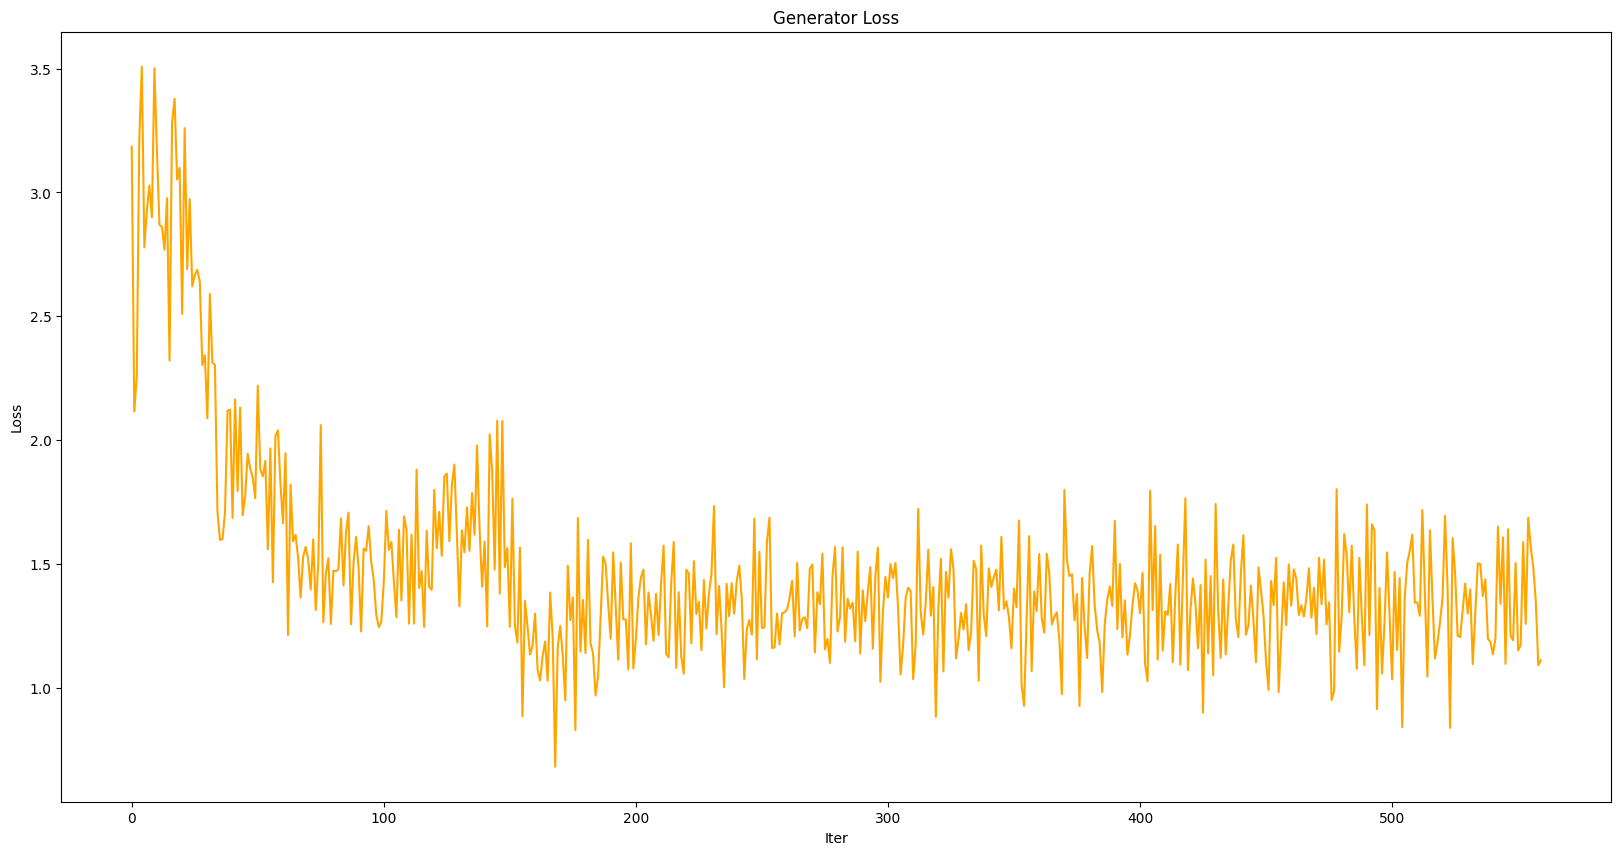

In [67]:
plt.figure(figsize = (20, 10))
plt.plot(gen_loss, color = 'orange')
plt.title('Generator Loss')
plt.xlabel('Iter')
plt.ylabel('Loss')
plt.show()

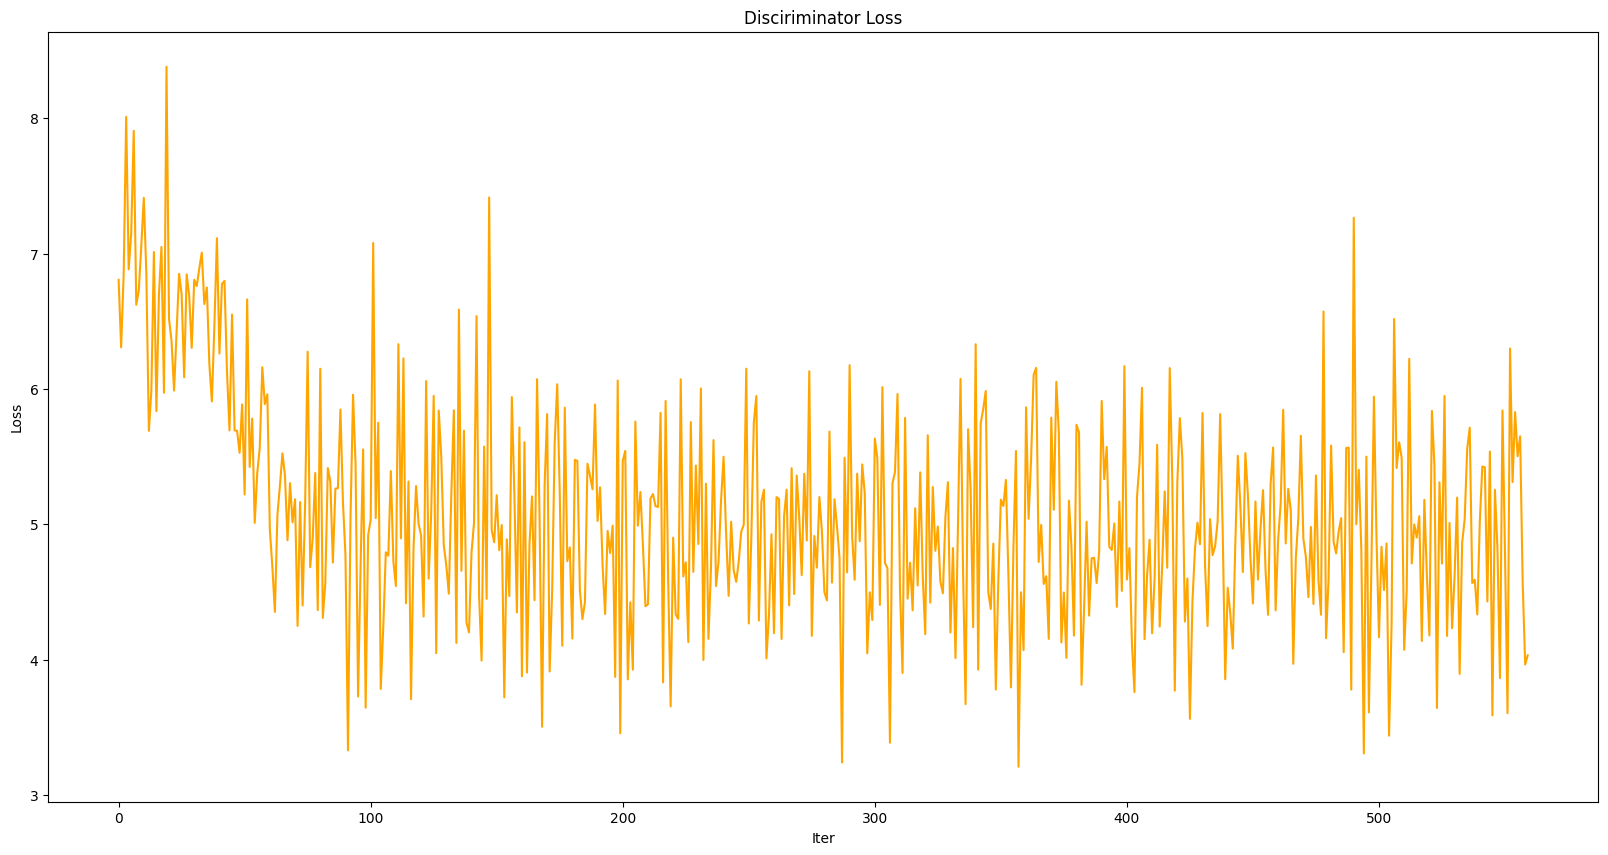

In [68]:
plt.figure(figsize = (20, 10))
plt.plot(disc_loss, color = 'orange')
plt.title('Disciriminator Loss')
plt.xlabel('Iter')
plt.ylabel('Loss')
plt.show()

In [69]:
m = tf.where(tf.math.is_nan(train_data), tf.zeros_like(train_data), tf.ones_like(train_data))
train_data_C = tf.where(tf.math.is_nan(train_data), tf.zeros_like(train_data), train_data)
z = np.random.uniform(0, 0.01, size = train_data.shape)
train_data = tf.math.multiply(train_data_C, m) + tf.math.multiply((tf.ones_like(m) - m), z)

In [70]:
X_temp = tf.cast(generator(tf.concat([train_data, m], 1), training = True), tf.float64)
X_hat = tf.math.multiply(m, train_data) + tf.math.multiply((tf.ones_like(m) - m), X_temp)

In [71]:
pred = X_hat
X_hat
gainimpu=X_hat.numpy()

In [72]:
df_ = dfgan
test = []
for idx_col, col in enumerate(dfgan):
  for idx_row, row in enumerate(dfgan.loc[:, col]):
    if np.isnan(row):
      test.append(f'{idx_row}-{col}')
res = []
for col_idx, col in enumerate(df_):
  for row_idx, row in enumerate(df_.loc[:, col]):
    if np.isnan(row):
      res.append(pred[row_idx, col_idx])

In [73]:
out = np.array([test, res],dtype=object)
out = pd.DataFrame(out.T)
out = out.rename({0: 'row-col', 1: 'value'}, axis = 1)
out.to_csv('./Datasets/gainresults.csv', index = False)
out

,row-col,value
0,5-Ag,"tf.Tensor(0.0, shape=(), dtype=float64)"
1,7-Ag,"tf.Tensor(0.0, shape=(), dtype=float64)"
2,8-Ag,"tf.Tensor(0.9855239391326904, shape=(), dtype=..."
3,9-Ag,"tf.Tensor(0.0, shape=(), dtype=float64)"
4,12-Ag,"tf.Tensor(0.994796633720398, shape=(), dtype=f..."
...,...,...
2758,239-Zr,"tf.Tensor(1.0, shape=(), dtype=float64)"
2759,241-Zr,"tf.Tensor(1.0, shape=(), dtype=float64)"
2760,242-Zr,"tf.Tensor(0.9985942840576172, shape=(), dtype=..."
2761,243-Zr,"tf.Tensor(1.0, shape=(), dtype=float64)"


 Multiple Imputation by Chained Equations (MICE)

In [74]:
pip install fancyimpute

In [75]:
from fancyimpute import IterativeImputer

In [76]:
obesity_mice_imputed = x_missing.copy()

mice_imputer = IterativeImputer()

obesity_mice_imputed.iloc[:, :] = mice_imputer.fit_transform(obesity_mice_imputed)


In [77]:
obesity_mice_imputed.isnull().sum()

Ag       0
As       0
Au       0
BaO      0
Bi       0
Co       0
Cr2O3    0
Cs       0
Cu       0
MnO      0
Mo       0
Nb       0
Ni       0
Pb       0
Rb       0
Sb       0
Sn       0
SrO      0
Th       0
U3O8     0
V        0
W        0
Y        0
Zn       0
Zr       0
dtype: int64

Result comparison

In [78]:
from sklearn.metrics import mean_squared_error

In [79]:
import statistics

In [80]:
Xval=X_full.values

In [81]:
stdx=statistics.stdev(Xval.flatten(), xbar=None)

In [82]:
stdx

25538.51493285788

In [83]:
#traditional mean
mse_mean = mean_squared_error(X_full, df_imputedmean)
print('mse_mean',mse_mean)

rmse_mean = mean_squared_error(X_full, df_imputedmean, squared=False)
print('rmse_mean',rmse_mean)

nmse_mean= rmse_mean/stdx
print('nmse_mean',nmse_mean)


#traditional mode
mse_frequence = mean_squared_error(X_full, df_imputerfrequent)
print('mse_frequence',mse_frequence)

rmse_frequence = mean_squared_error(X_full, df_imputerfrequent, squared=False)
print('rmse_frequence',rmse_frequence)

nmse_frequence= rmse_frequence/stdx
print('nmse_frequence',nmse_frequence)

#traditional median
mse_median = mean_squared_error(X_full, df_imputermedian)
print('mse_median',mse_median)

rmse_median = mean_squared_error(X_full, df_imputermedian, squared=False)
print('rmse_median',rmse_median)

nmse_median= rmse_median/stdx
print('nmse_median',nmse_median)

#mice
mse_mice_stats = mean_squared_error(X_full, obesity_mice_imputed)
print('mse_mice_stats',mse_mice_stats)

rmse_mice_stats = mean_squared_error(X_full, obesity_mice_imputed, squared=False)
print('rmse_mice_stats',rmse_mice_stats)

nmse_mice_stats= rmse_mice_stats/stdx
print('nmse_mice_stats',nmse_mice_stats)


#GAIN
mse_gain_stats = mean_squared_error(X_full, gainimpu)
print('mse_gain_stats',mse_gain_stats)

rmse_gain_stats = mean_squared_error(X_full, gainimpu, squared=False)
print('rmse_gain_stats',rmse_gain_stats)

nmse_gain_stats= rmse_gain_stats/stdx
print('nmse_gain_stats',nmse_gain_stats)

#RF
data_copy=data_copy.to_numpy()
rfdata_copy=data_copy[:,0:-1]
mse_RF_stats = mean_squared_error(X_full, rfdata_copy)
print('mse_RF_stats',mse_RF_stats)

rmse_RF_stats = mean_squared_error(X_full, rfdata_copy, squared=False)
print('rmse_RF_stats',rmse_RF_stats)

nmse_RF_stats= rmse_RF_stats/stdx
print('nmse_RF_stats',nmse_RF_stats)

#KNN
mse_KNN_stats = mean_squared_error(X_full, df_imputedKNN)
print('mse_KNN_stats',mse_KNN_stats)

rmse_KNN_stats = mean_squared_error(X_full, df_imputedKNN, squared=False)
print('rmse_KNN_stats',rmse_KNN_stats)

nmse_KNN_stats= rmse_KNN_stats/stdx
print('nmse_KNN_stats',nmse_KNN_stats)


mse_mean 194642125.42933276
rmse_mean 2835.1339439234994
nmse_mean 0.11101404883475871
mse_frequence 260777497.09181294
rmse_frequence 3279.507394194969
nmse_frequence 0.12841417767700938
mse_median 208745224.43716943
rmse_median 2938.256557252387
nmse_median 0.11505197404693344
mse_mice_stats 311821922.27867657
rmse_mice_stats 3578.2024608404954
nmse_mice_stats 0.140110044387772
mse_gain_stats 262476845.65620697
rmse_gain_stats 3304.1187615235795
nmse_gain_stats 0.12937787378045607
mse_RF_stats 178042420.85883227
rmse_RF_stats 2709.211463638718
nmse_RF_stats 0.1060833596143464
mse_KNN_stats 219598979.42399293
rmse_KNN_stats 3009.874365172829
nmse_KNN_stats 0.11785627993976742


In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns


sns.set(context='notebook',style='whitegrid')


import warnings
warnings.filterwarnings('ignore')

In [85]:
Methods=["Mean","Median","Mode","MICE","KNN","RF","GAIN"]
RMSE=[rmse_mean,rmse_median,rmse_frequence,rmse_mice_stats,rmse_KNN_stats,rmse_RF_stats,rmse_gain_stats]
NMSE=[nmse_mean,nmse_median,nmse_frequence,nmse_mice_stats,nmse_KNN_stats,nmse_RF_stats,nmse_gain_stats]
MSE=[mse_mean,mse_median,mse_frequence,mse_mice_stats,mse_KNN_stats,mse_RF_stats,mse_gain_stats]


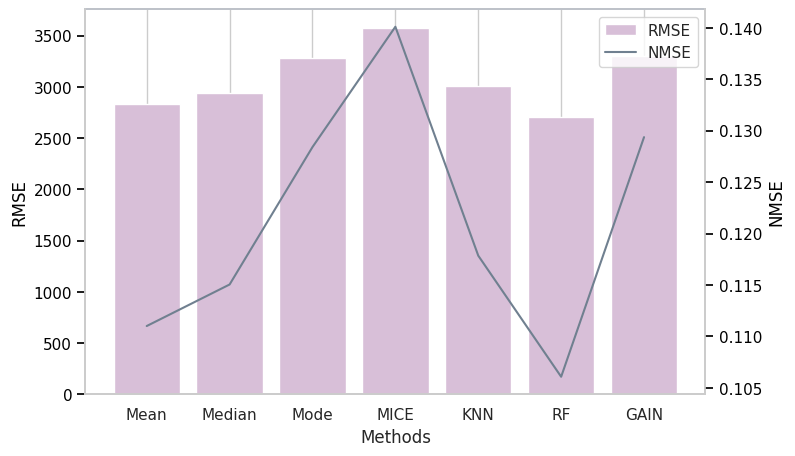

In [86]:
fig, ax = plt.subplots(figsize=(8,5))
ax2=ax.twinx()
h1=ax.bar(Methods, RMSE, color="thistle")
h2, =ax2.plot(Methods, NMSE, color="slategray")
plt.legend(handles=[h1,h2],labels=['RMSE','NMSE'],loc=0)
ax.set_xlabel("Methods")
ax.set_ylabel("RMSE")
ax.xaxis.grid(True)
ax.yaxis.grid(False)



ax2.set_ylabel("NMSE")
ax2.xaxis.grid(True)
ax2.yaxis.grid(False)
ax.spines['top'].set_color('b')
ax.tick_params(axis='y', colors='black')
ax2.tick_params(axis='y', colors='black')

ax.yaxis.label.set_color('black')
ax2.yaxis.label.set_color('black')
plt.savefig("error.png",bbox_inches='tight',dpi=500)
plt.show()

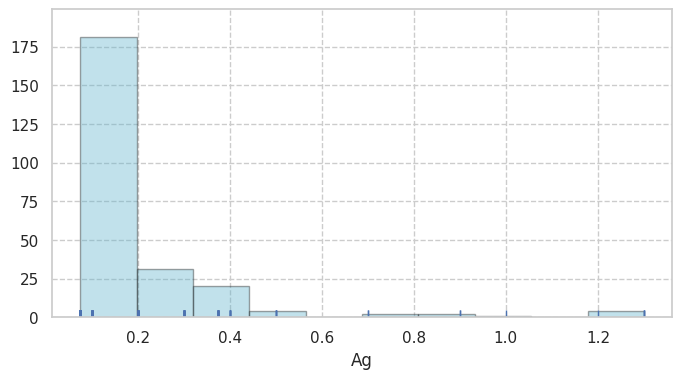

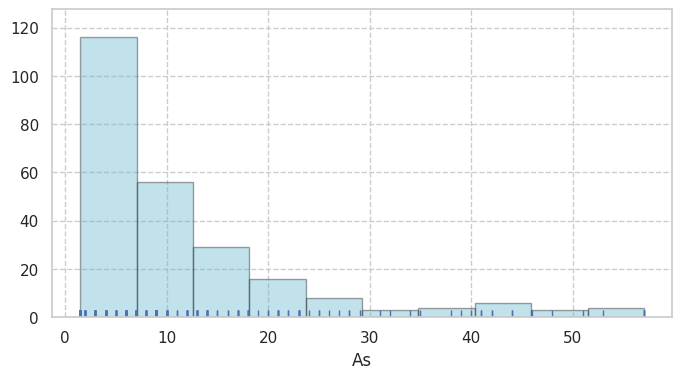

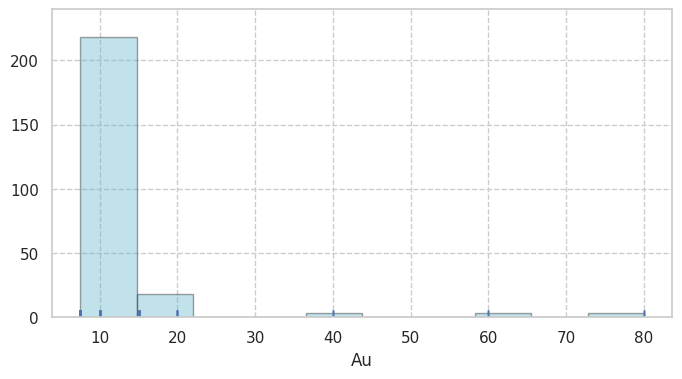

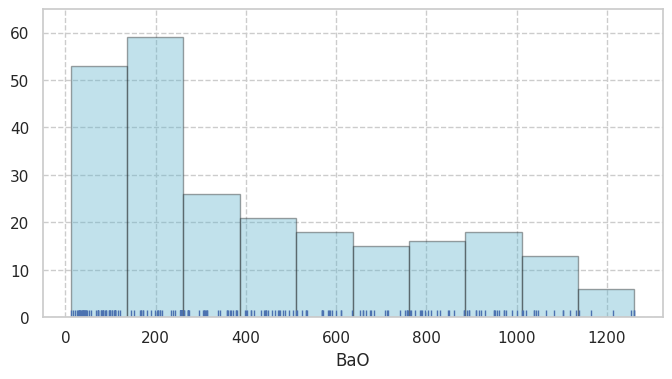

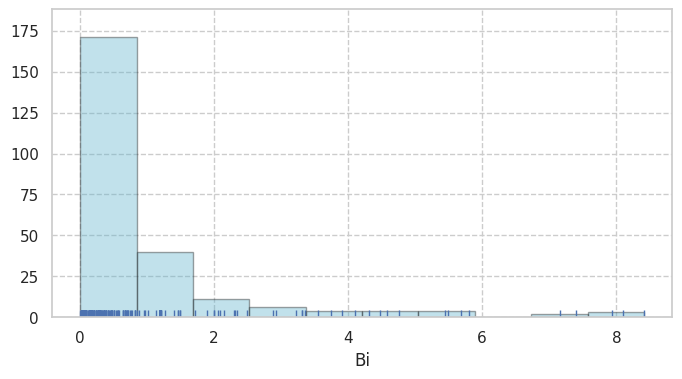

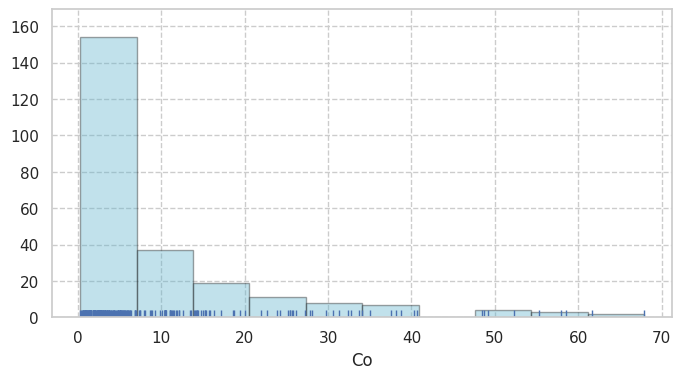

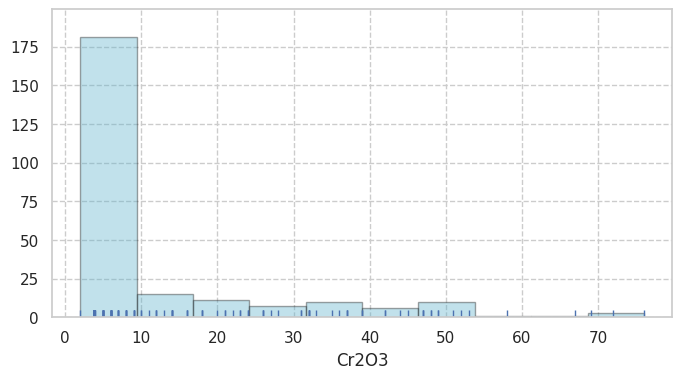

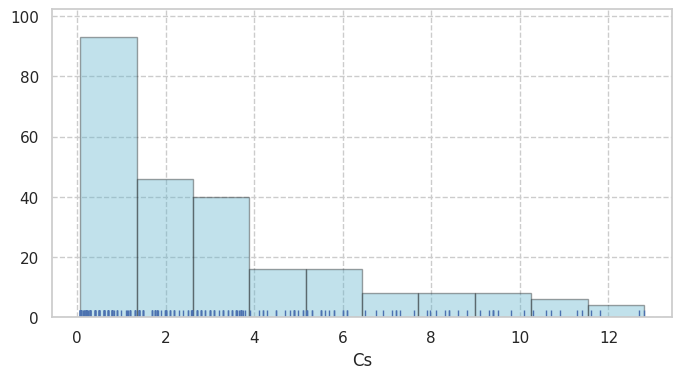

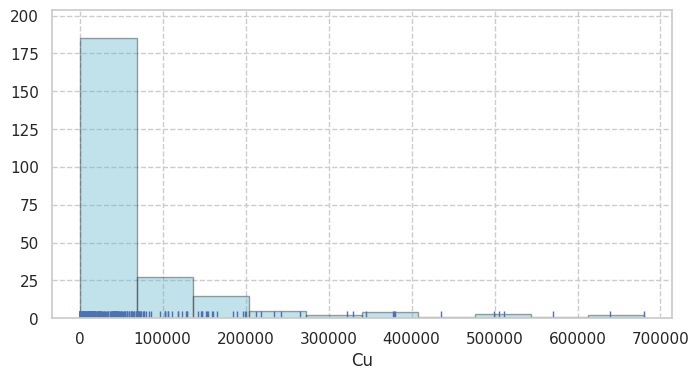

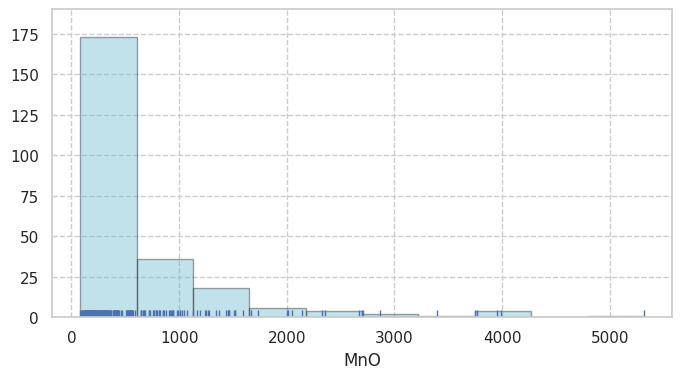

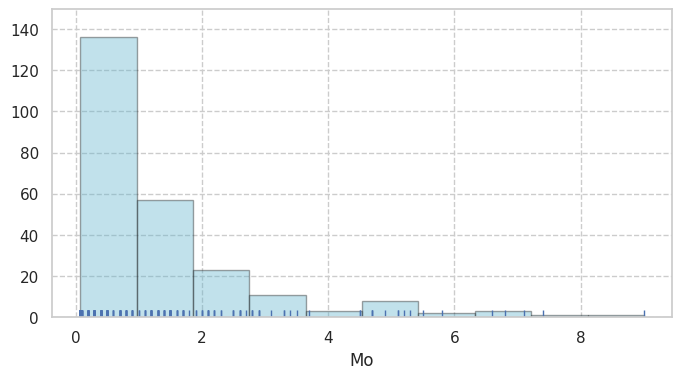

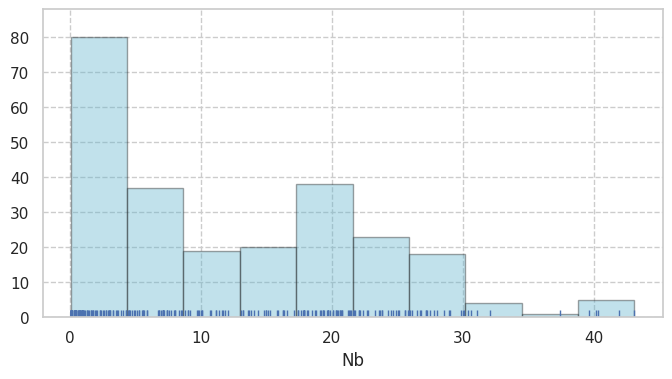

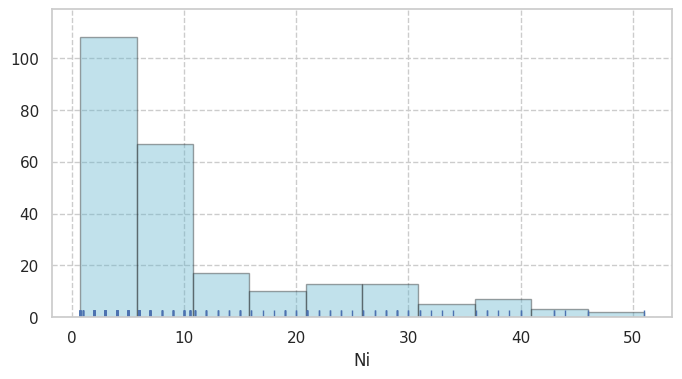

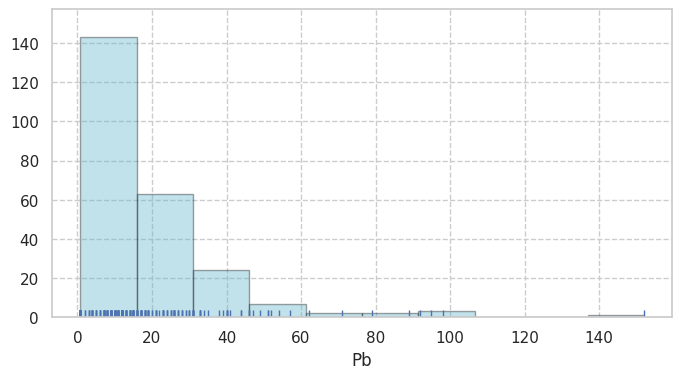

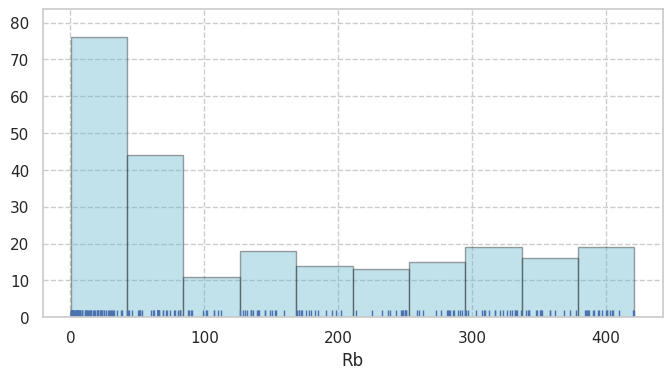

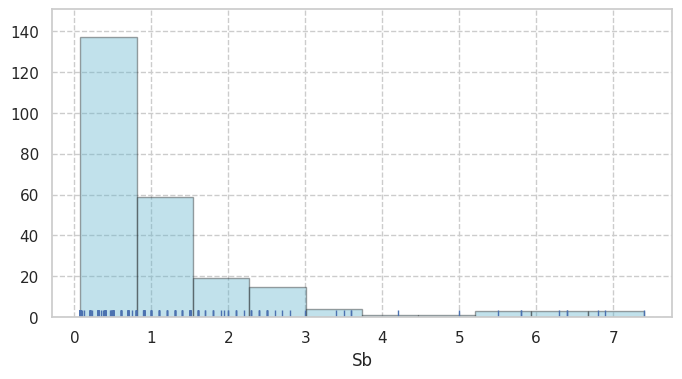

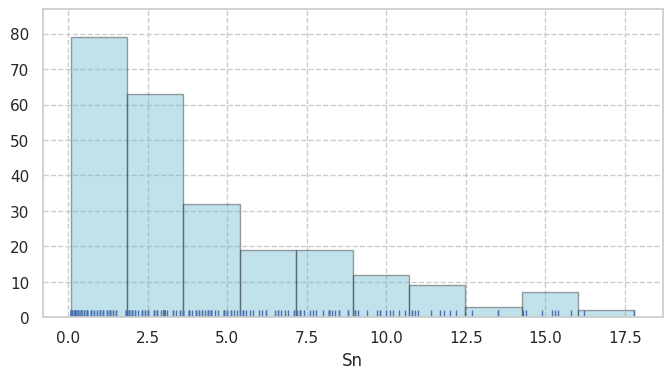

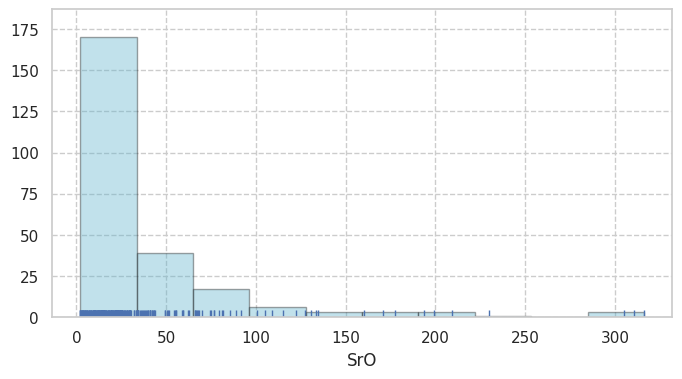

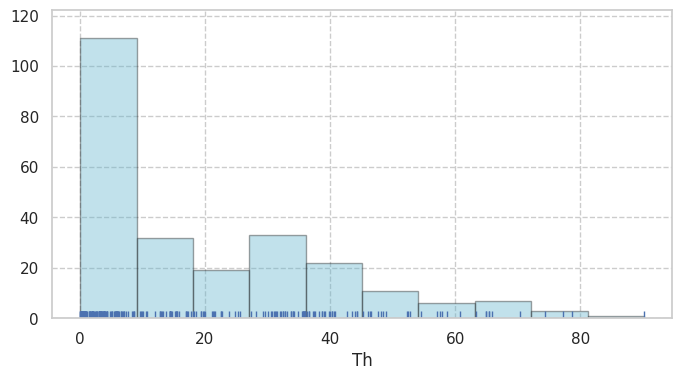

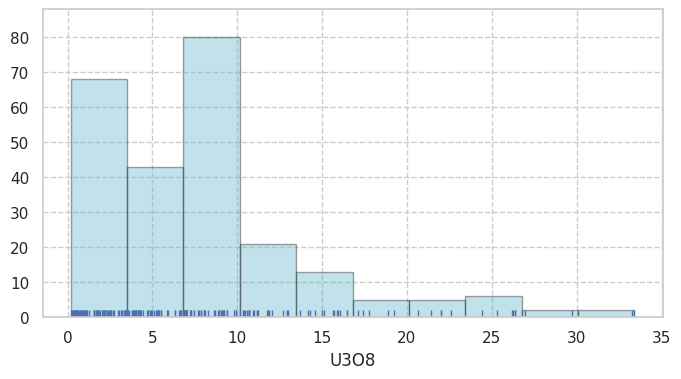

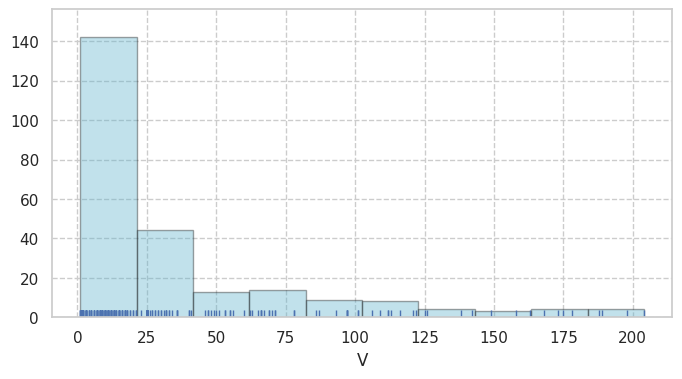

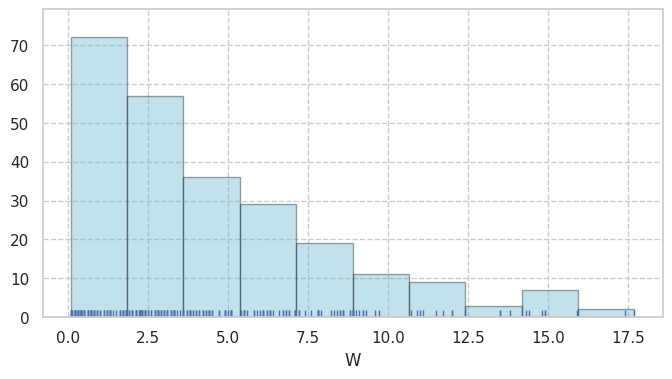

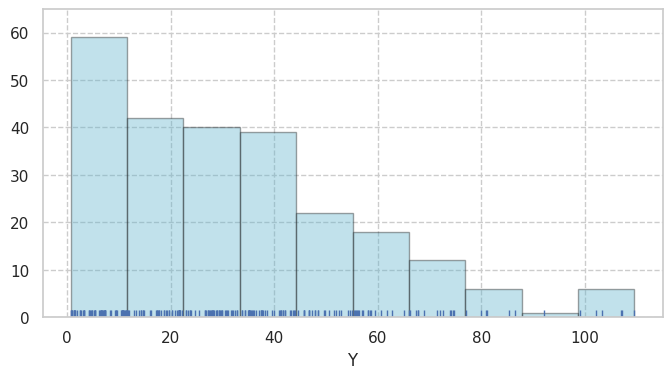

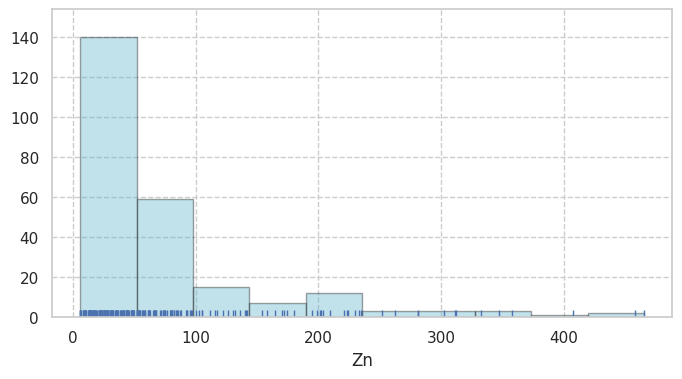

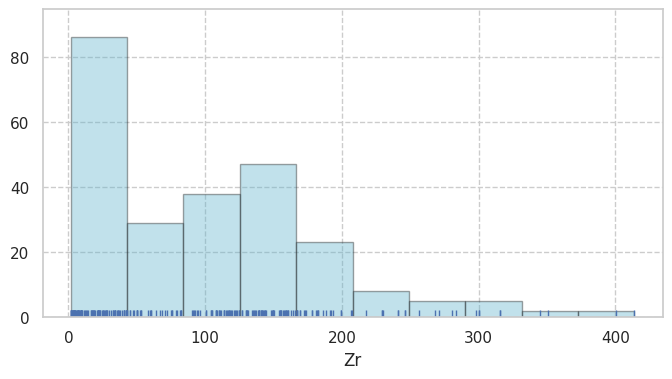

In [87]:
from scipy.stats import norm

rs = np.random.RandomState(50)
s = X_full


for i in s.columns:
  plt.figure(figsize=(8,4))
  sns.distplot(s[i], bins=10, hist=True, kde=False, norm_hist=False,
            rug=True,
            hist_kws={'color':'c','edgecolor':'k'},
            )

  plt.grid(linestyle='--')
  plt.show()


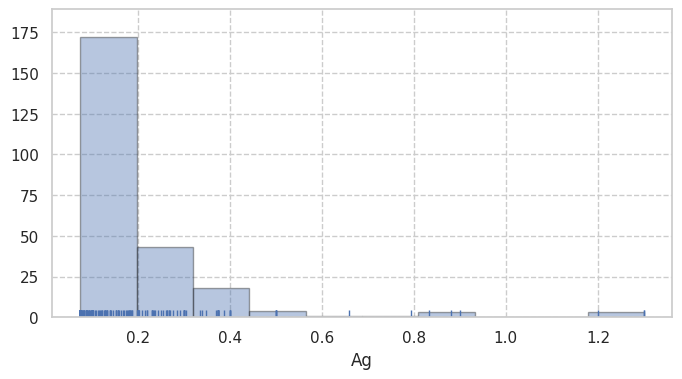

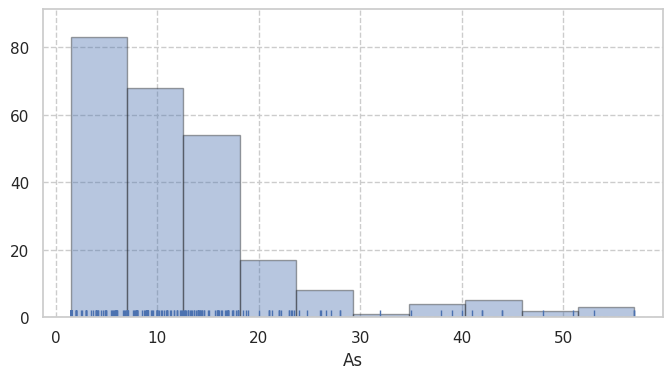

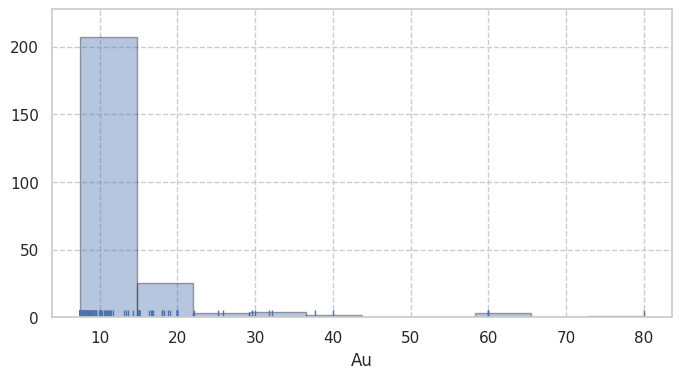

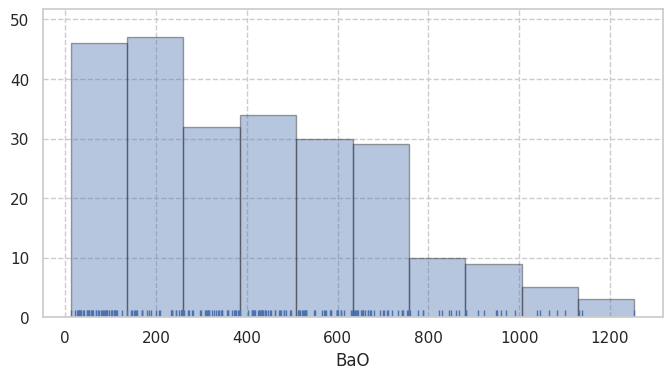

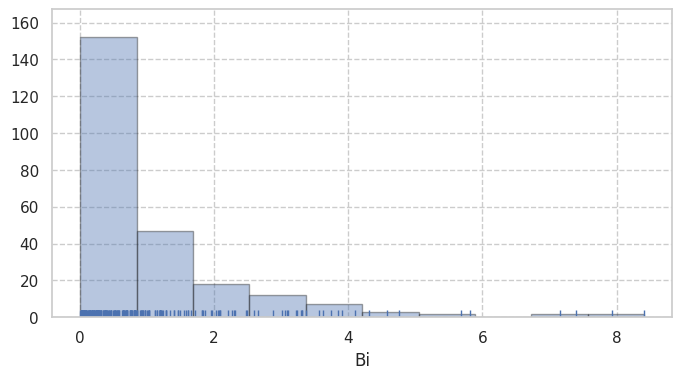

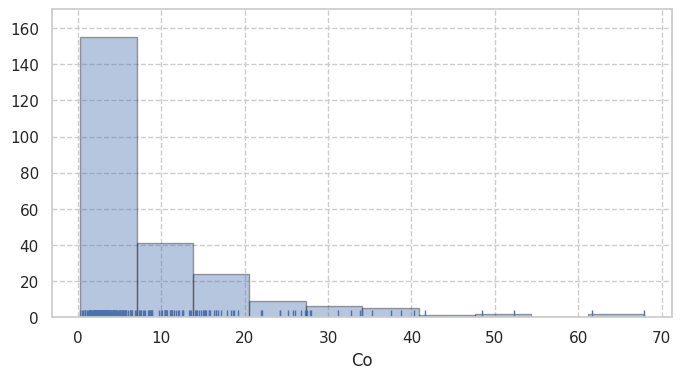

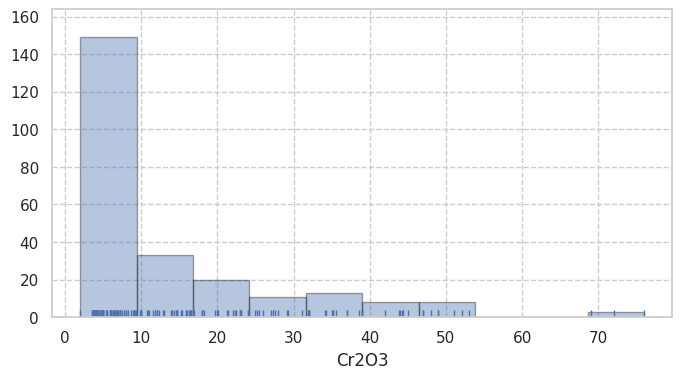

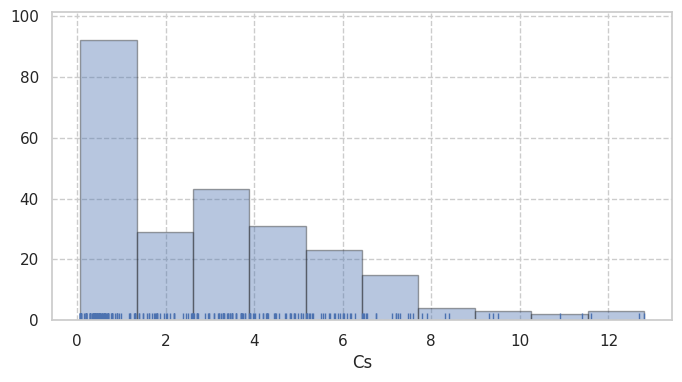

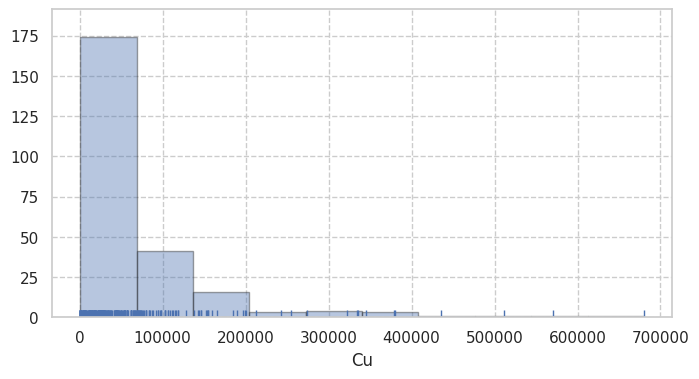

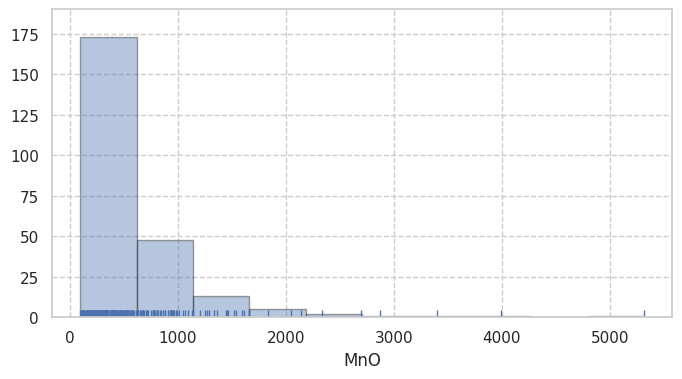

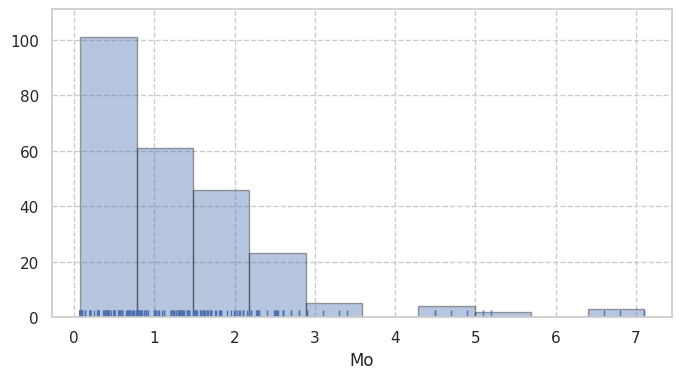

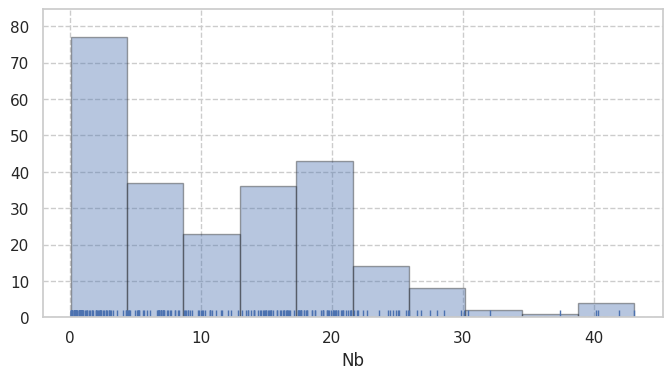

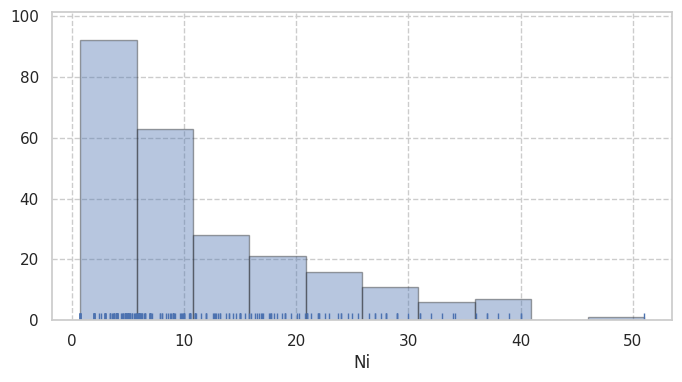

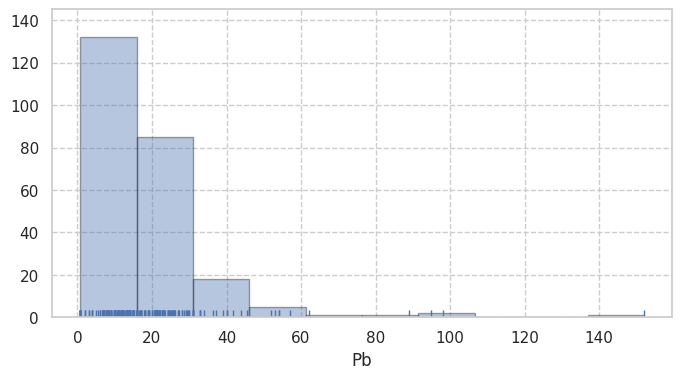

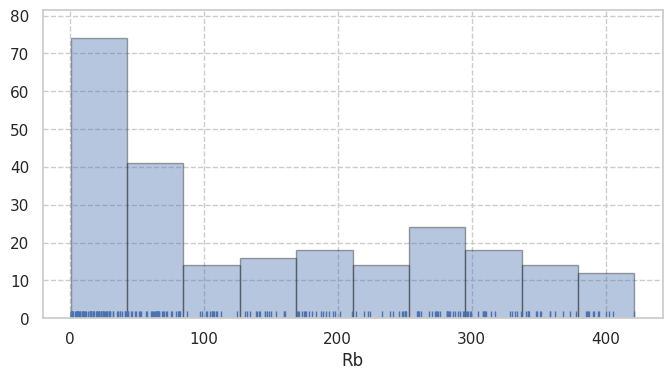

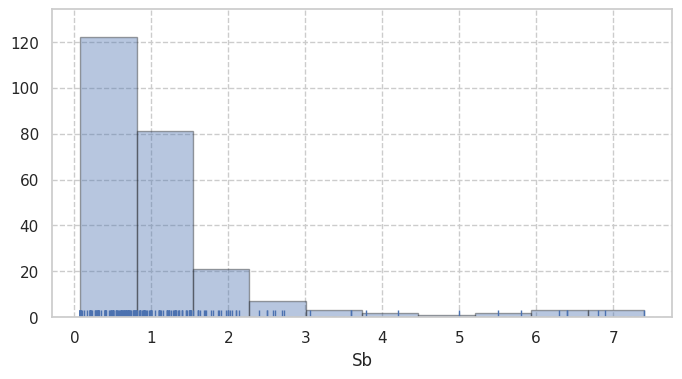

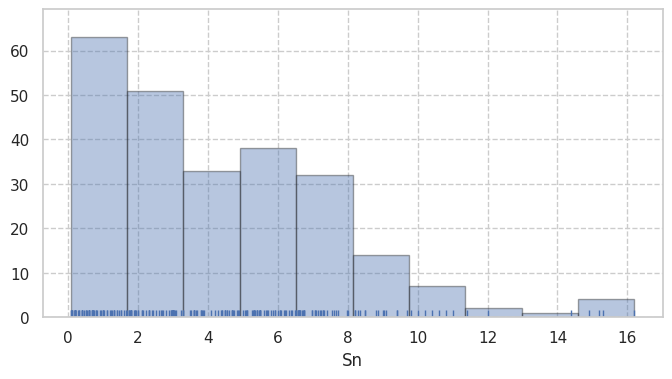

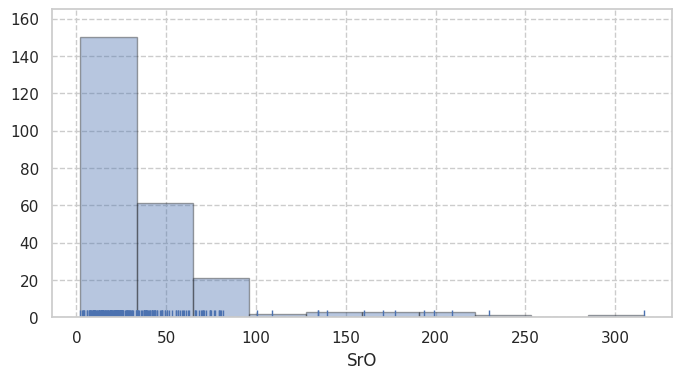

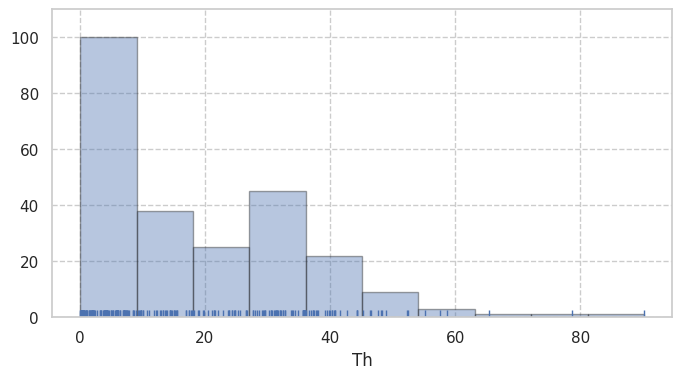

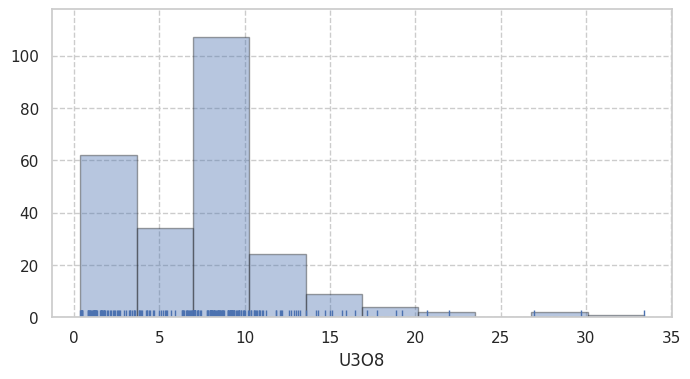

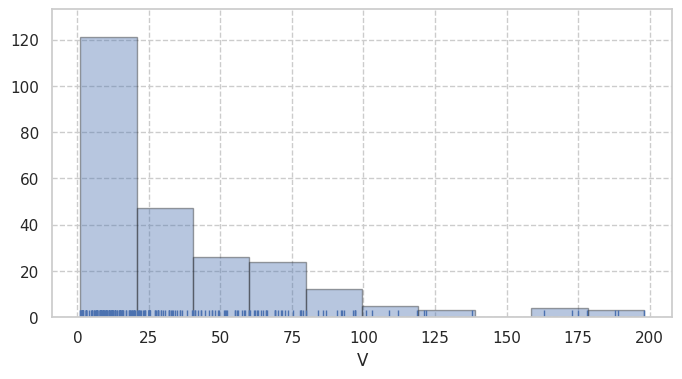

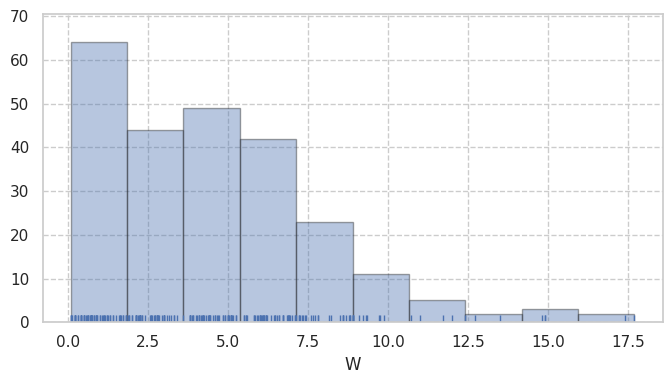

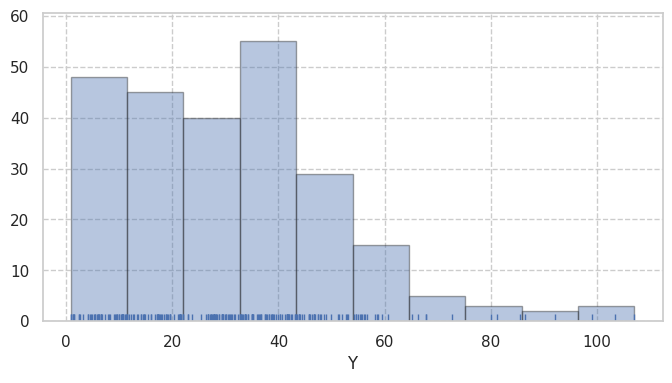

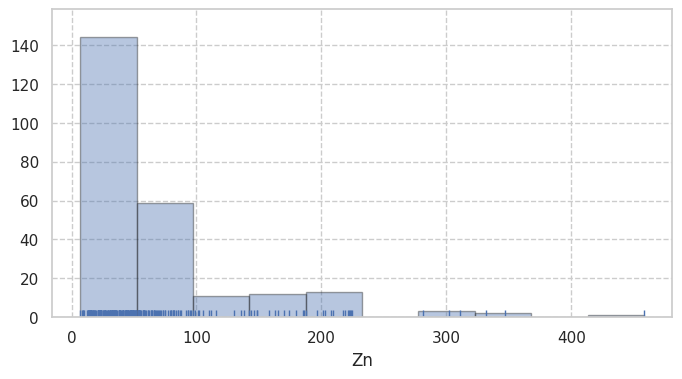

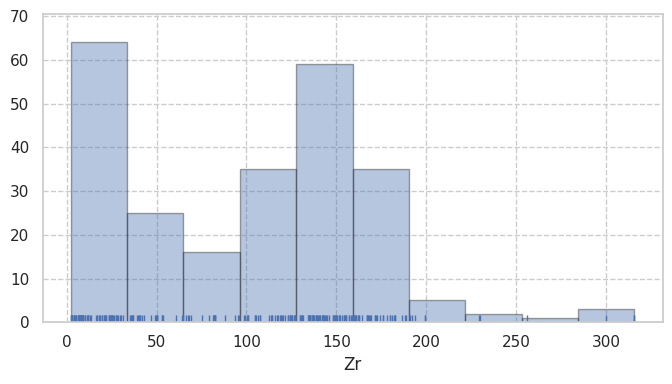

In [88]:
from scipy.stats import norm
import matplotlib.ticker as mtick
from matplotlib.ticker import ScalarFormatter

rs = np.random.RandomState(50)
data_rf = pd.DataFrame(rfdata_copy,columns=s.columns)
n = data_rf


for i in n.columns:
  plt.figure(figsize=(8,4))
  sns.distplot(n[i], bins=10, hist=True, kde=False, norm_hist=False,
            rug=True,
            hist_kws={'color':'b','edgecolor':'k'},
            )


  plt.grid(linestyle='--')
  plt.show()


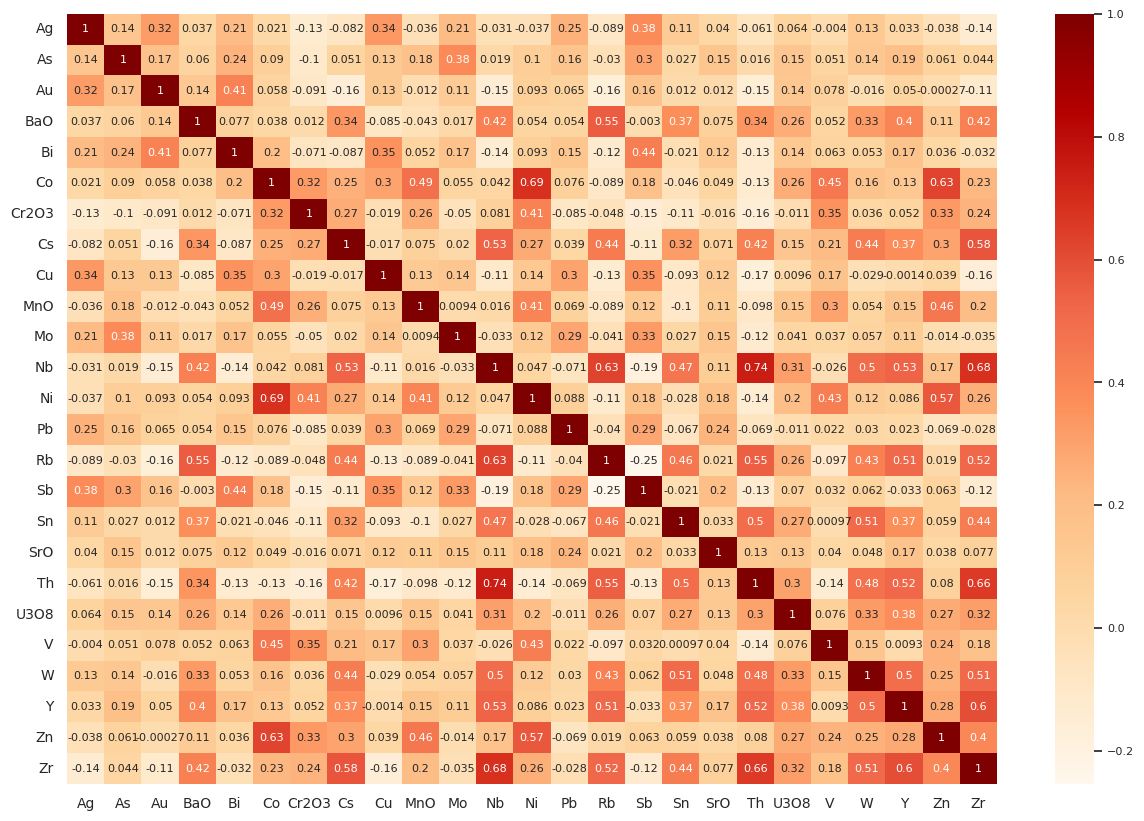

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
s.corr()

#Correlation heatmap
plt.figure(figsize=(15,10))
ax3=sns.heatmap(s.corr(), annot = True,cmap='OrRd', annot_kws={"fontsize":8})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
cbar = ax3.collections[0].colorbar
cbar.ax.tick_params(labelsize=8)
plt.savefig("corrfull.png",bbox_inches='tight',dpi=500)

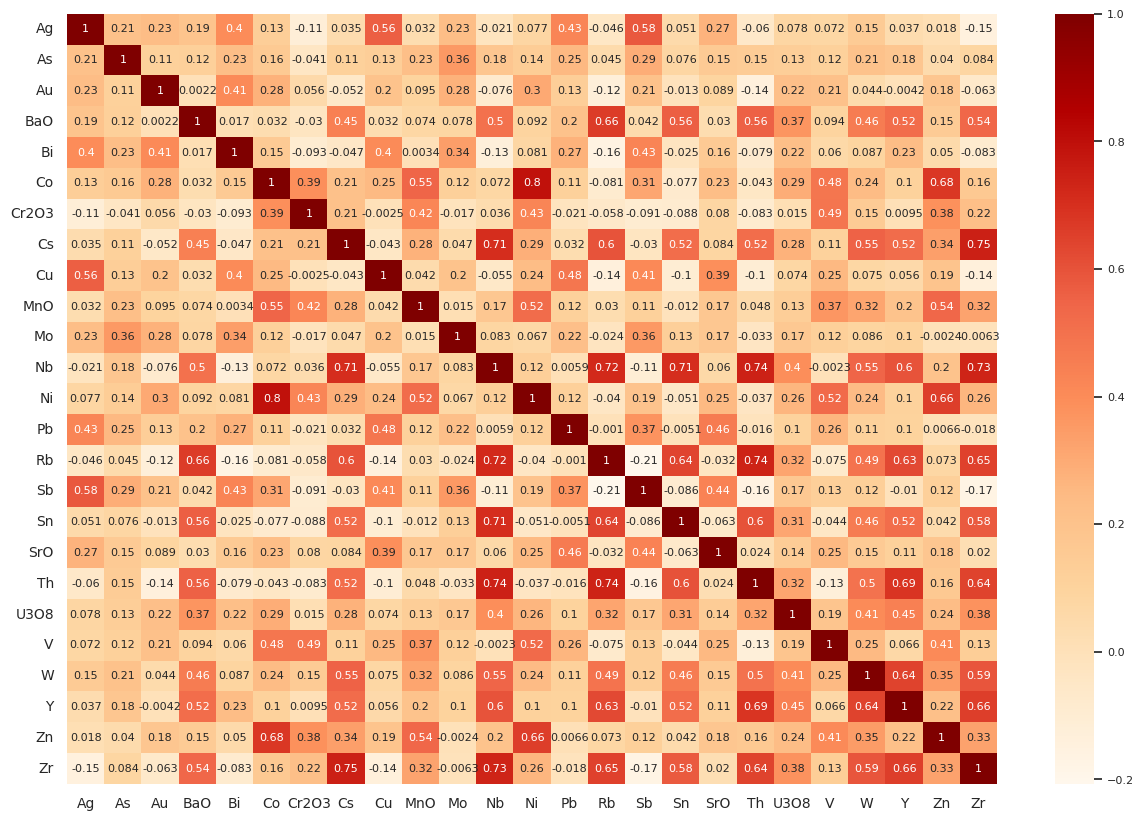

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
n.corr()

#Correlation heatmap
plt.figure(figsize=(15,10))
ax4=sns.heatmap(n.corr(), annot = True,cmap='OrRd', annot_kws={"fontsize":8})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
cbar = ax4.collections[0].colorbar
cbar.ax.tick_params(labelsize=8)
plt.savefig("corrRF.png",bbox_inches='tight',dpi=500)

